In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
combined = pd.read_csv('C:/Users/T.S JAIKISHORE/Downloads/archive (1)/Dataset.csv')

combined.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [3]:
combined.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [4]:
rows_to_drop_train = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
df_train = combined.drop(rows_to_drop_train.index)
df_train.to_csv('C:/Users/T.S JAIKISHORE/Downloads/archive (1)/data_part1.csv', index=False)

rows_to_drop_test = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
df_test = combined.drop(rows_to_drop_test.index)
df_test.to_csv('C:/Users/T.S JAIKISHORE/Downloads/archive (1)/data_part2.csv', index=False)

In [5]:
df_train = pd.read_csv('C:/Users/T.S JAIKISHORE/Downloads/archive (1)/data_part1.csv')
df_test = pd.read_csv('C:/Users/T.S JAIKISHORE/Downloads/archive (1)/data_part2.csv')

In [6]:
df_train.head(15)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [7]:
df_train.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [8]:
patients = list(df_test['Patient_ID'].unique())
len(patients)

20000

In [19]:
def corr_matrix(df):
    # Calculate the correlation matrix
    corr = df.corr()
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    
    # Define a custom color map with more pronounced red shades
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "red_white", ["#8B0000", "#FF6347", "#FFD700"], N=256
    )
    
    # Draw the heatmap with the custom color map
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5, "label": "Correlation Coefficient"})
    
    # Add title for clarity
    plt.title("Correlation Matrix", size=20)
    
    # Display the plot
    plt.show()

In [20]:
null_values = df_train.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

EtCO2               100.000000
TroponinI            99.877881
Bilirubin_direct     99.850420
Fibrinogen           99.236917
Bilirubin_total      98.773372
Alkalinephos         98.540650
AST                  98.504205
Lactate              96.565112
PTT                  95.152459
SaO2                 95.044387
Calcium              95.024392
Phosphate            94.951247
Platelets            93.482913
Creatinine           93.357884
WBC                  92.489639
Magnesium            92.219712
HCO3                 91.949406
BUN                  91.840702
Chloride             91.676063
PaCO2                91.231753
Hgb                  91.164303
BaseExcess           89.574863
Potassium            89.137640
pH                   88.532868
Hct                  88.223711
Glucose              87.768392
FiO2                 85.807027
Temp                 66.224255
Unit2                48.868346
Unit1                48.868346
Unit                 48.868346
DBP                  48.125763
SBP     

In [21]:
columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}

if 'Unit1' in df_train.columns and 'Unit2' in df_train.columns:
    df_train = df_train.assign(Unit=df_train['Unit1'] + df_train['Unit2'])

df_train_mod = df_train.drop(columns=columns_drop)

df_train_mod.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

In [22]:
df_train_mod.head(n=5)

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,NaN,72.0,16.5,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,NaN,42.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,NaN,74.0,14.0,0.4,NaN,NaN,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


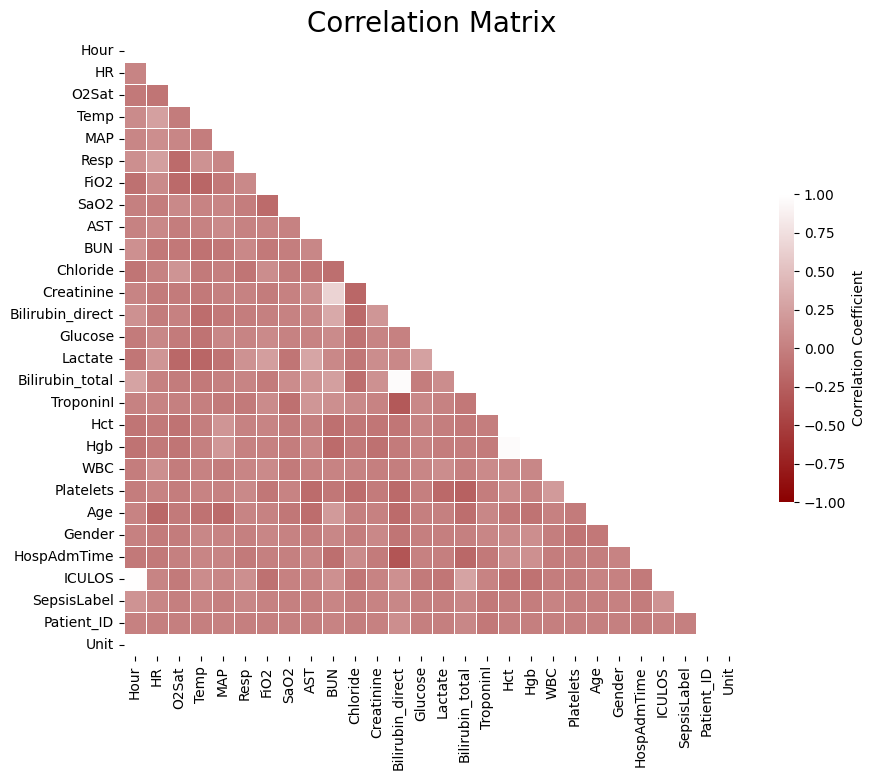

In [23]:
    
corr_matrix(df_train_mod)

In [61]:
df_train_impute = df_train_mod.copy()
df_train_impute['Patient_ID'] = df_train['Patient_ID']
columns_impute = list(df_train_impute.columns)

In [62]:
df_train_impute.head(n=5)

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,NaN,72.0,16.5,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,NaN,42.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,NaN,74.0,14.0,0.4,NaN,NaN,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [63]:
df_train_impute.update(
    df_train_impute.groupby('Patient_ID').transform(lambda x: x.bfill().ffill())
)


In [64]:
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

In [65]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,74.0,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [66]:
null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

TroponinI           97.357934
Bilirubin_direct    96.256841
Bilirubin_total     66.949754
AST                 66.435590
SaO2                57.282891
Lactate             55.997418
Unit                48.868346
FiO2                36.195592
WBC                  1.511994
Platelets            1.394810
Chloride             1.310656
Hgb                  1.158672
Creatinine           1.029467
Glucose              0.940630
BUN                  0.937719
Temp                 0.853692
Hct                  0.779028
Resp                 0.088710
O2Sat                0.026702
MAP                  0.003037
HR                   0.001139
HospAdmTime          0.001012
Age                  0.000000
Gender               0.000000
ICULOS               0.000000
SepsisLabel          0.000000
Patient_ID           0.000000
Hour                 0.000000
dtype: float64

In [67]:
null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [68]:
def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30)
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.xlabel(variable)
    plt.show()

In [69]:
def try_gaussian(df, col):
    print('Actual plot')
    diagnostic_plots(df, col)
    
    # Remove NaN and infinite values
    df_clean = df[np.isfinite(df[col])]
    
    # Apply Yeo-Johnson transformation
    try:
        df_clean['col_yj'], param = stats.yeojohnson(df_clean[col]) 
        print('Yeo-Johnson plot')
        diagnostic_plots(df_clean, 'col_yj')
    except Exception as e:
        print(f'Yeo-Johnson transformation failed for {col}: {e}')
    
    # Apply Box-Cox transformation if data is positive
    if (df_clean[col] > 0).all():
        try:
            df_clean['col_bc'], param = stats.boxcox(df_clean[col])
            print('Box-Cox plot')
            diagnostic_plots(df_clean, 'col_bc')
        except Exception as e:
            print(f'Box-Cox transformation failed for {col}: {e}')
    else:
        print(f'Box-Cox transformation skipped for {col} due to non-positive values')
    
    # Apply exponential transformation
    df_clean['col_1.5'] = df_clean[col] ** (1/1.5)
    print('**1/1.5 plot') 
    diagnostic_plots(df_clean, 'col_1.5')
    
    df_clean['col_0.5'] = df_clean[col] ** 0.5
    print('**0.5 plot') 
    diagnostic_plots(df_clean, 'col_0.5')
    
    # Apply inverse transformation
    df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)
    print('Inverse plot')
    diagnostic_plots(df_clean, 'col_rec')
    
    # Apply logarithmic transformation
    df_clean['col_log'] = np.log(df_clean[col] + 1)
    print('Logarithmic plot')
    diagnostic_plots(df_clean, 'col_log')
    
    # Apply square root transformation
    df_clean['col_sqrt'] = np.sqrt(df_clean[col])
    print('Square root plot')
    diagnostic_plots(df_clean, 'col_sqrt')

O2Sat
Actual plot


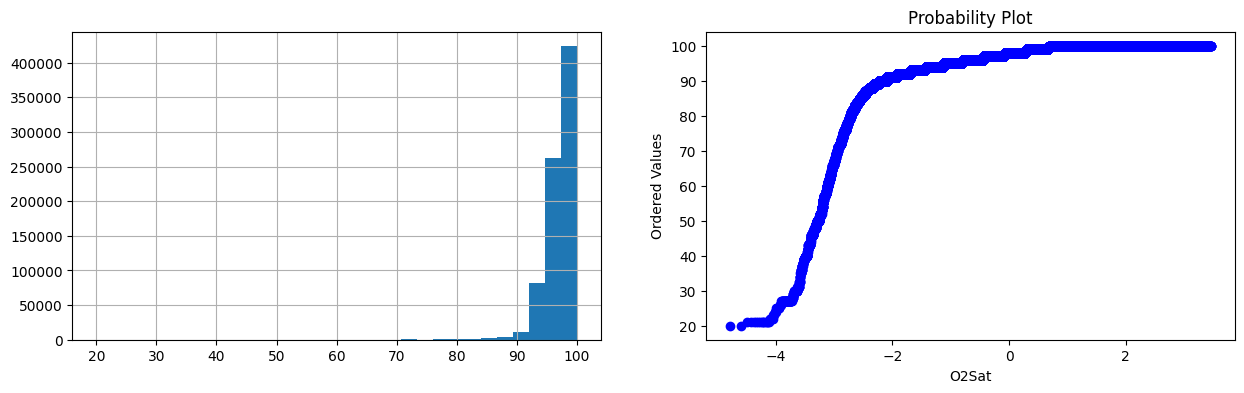

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


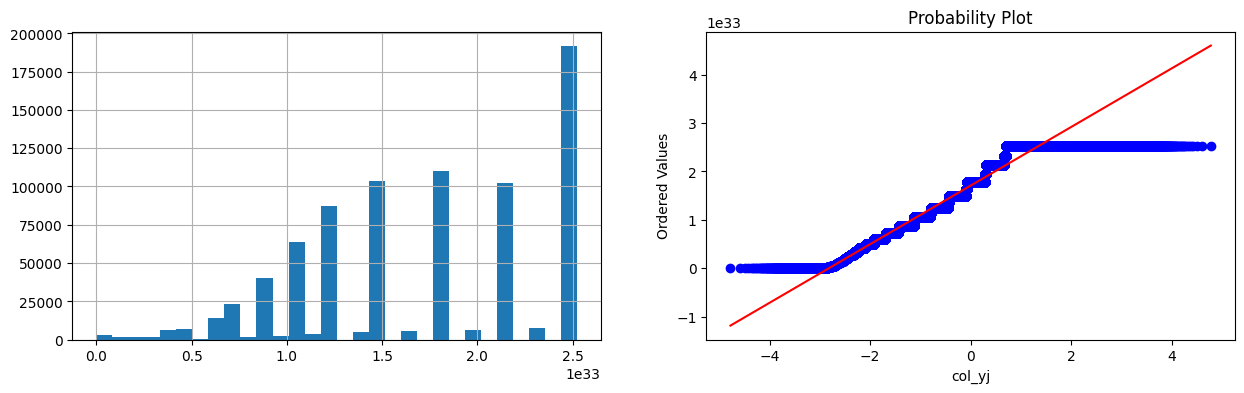

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


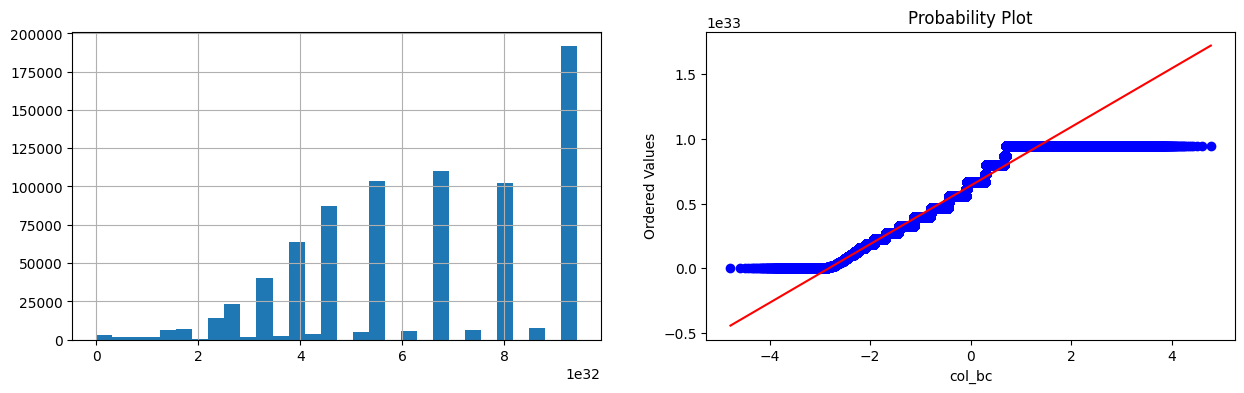

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


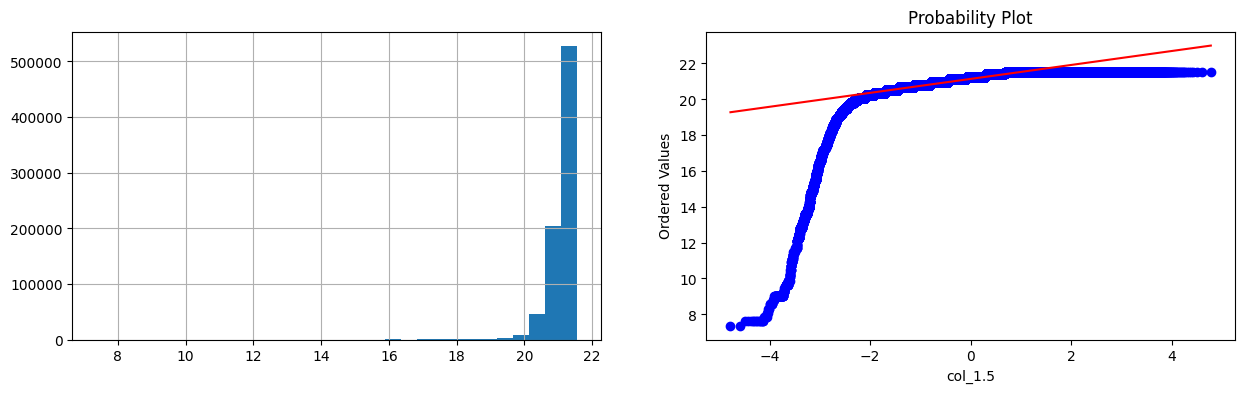

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


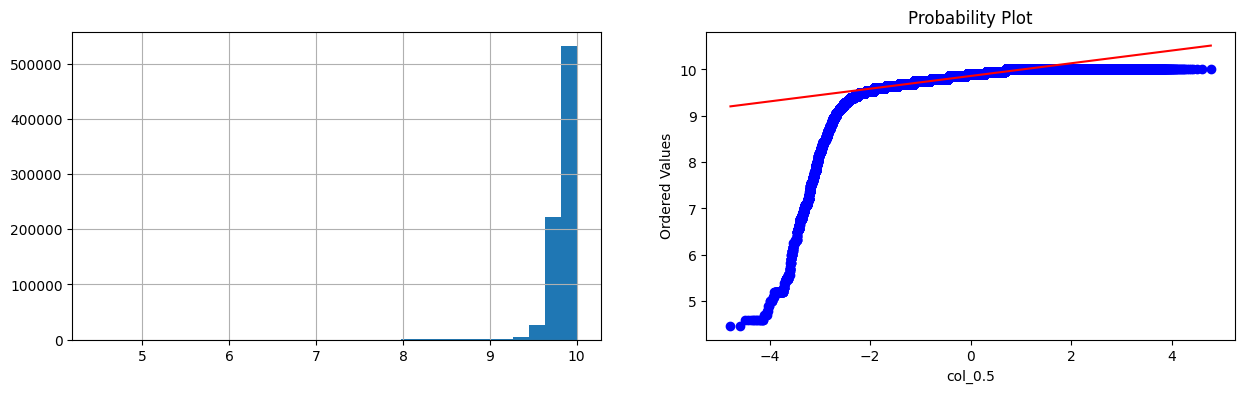

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


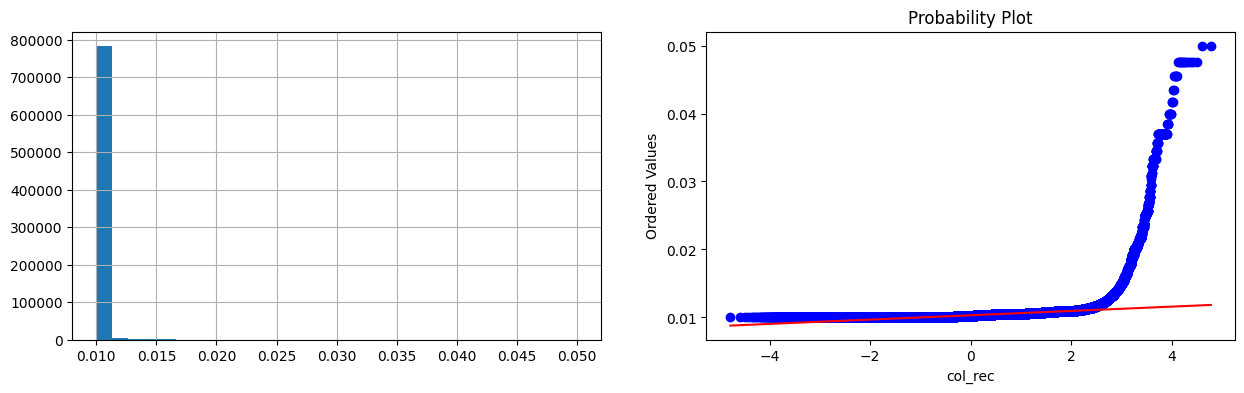

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


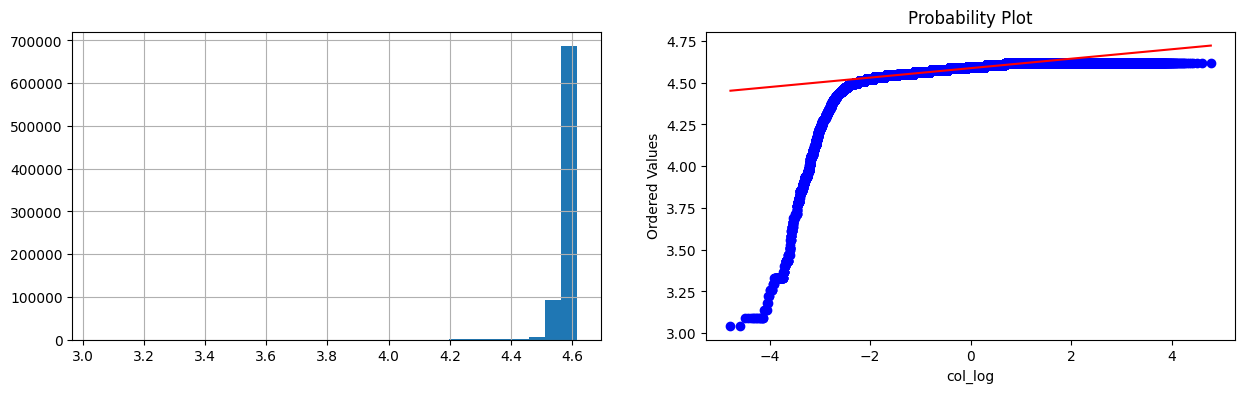

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


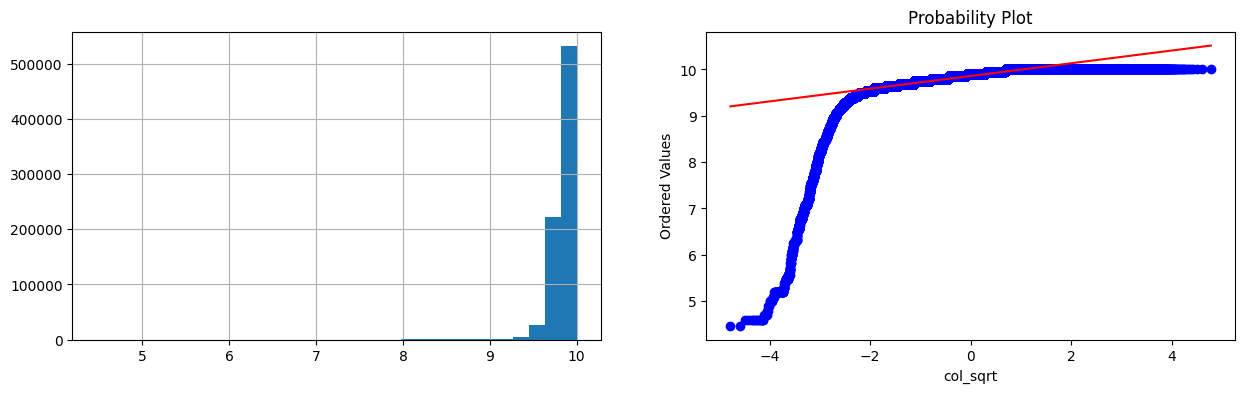

Temp
Actual plot


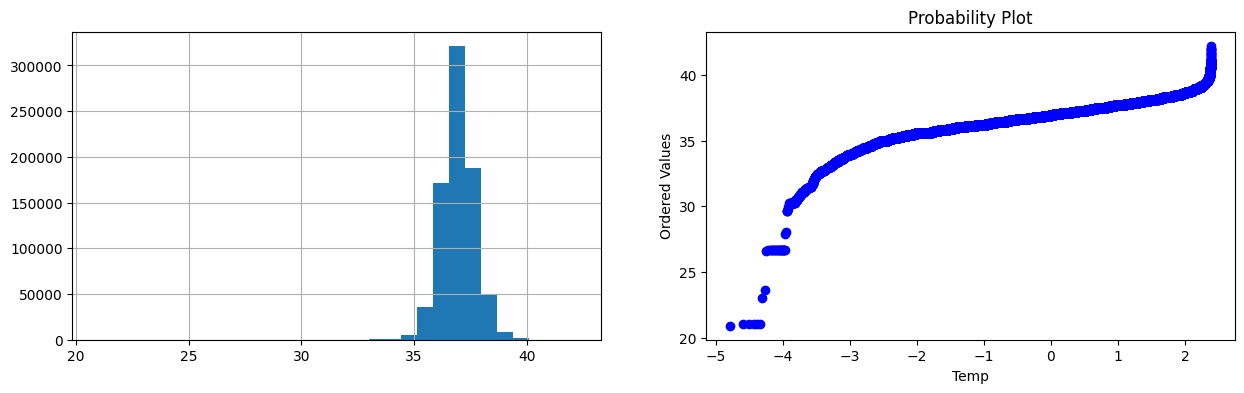

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


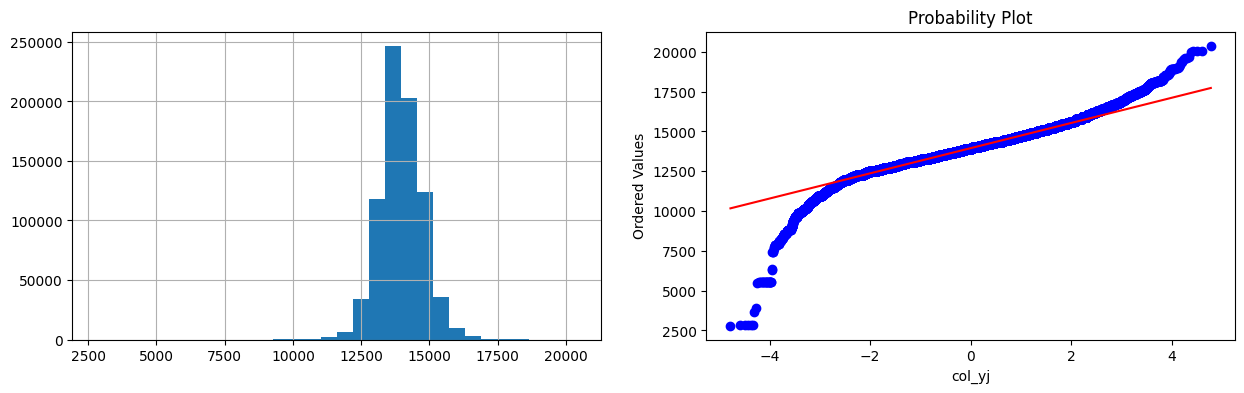

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


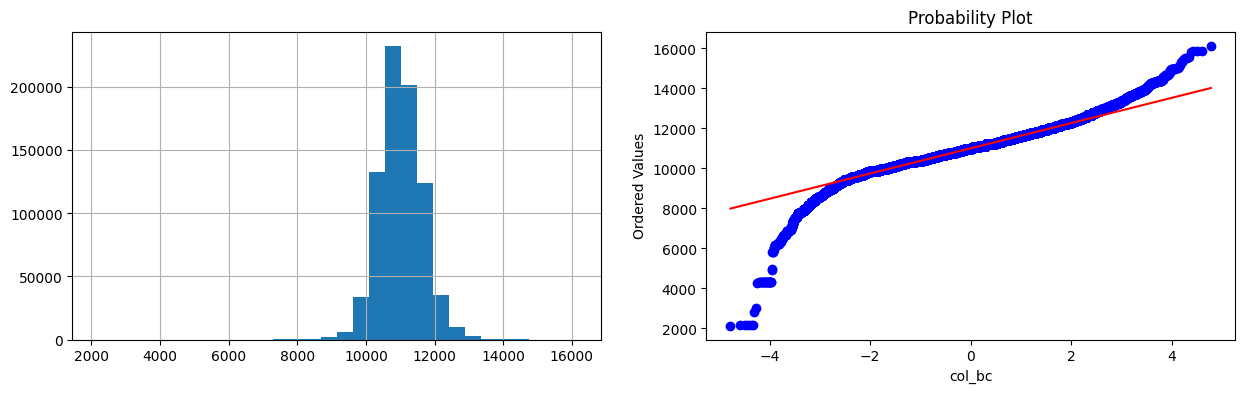

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


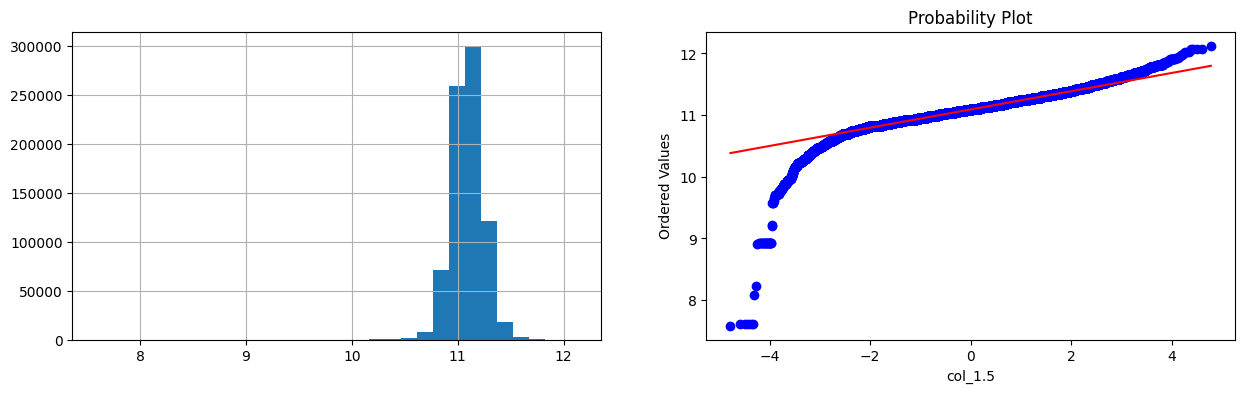

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


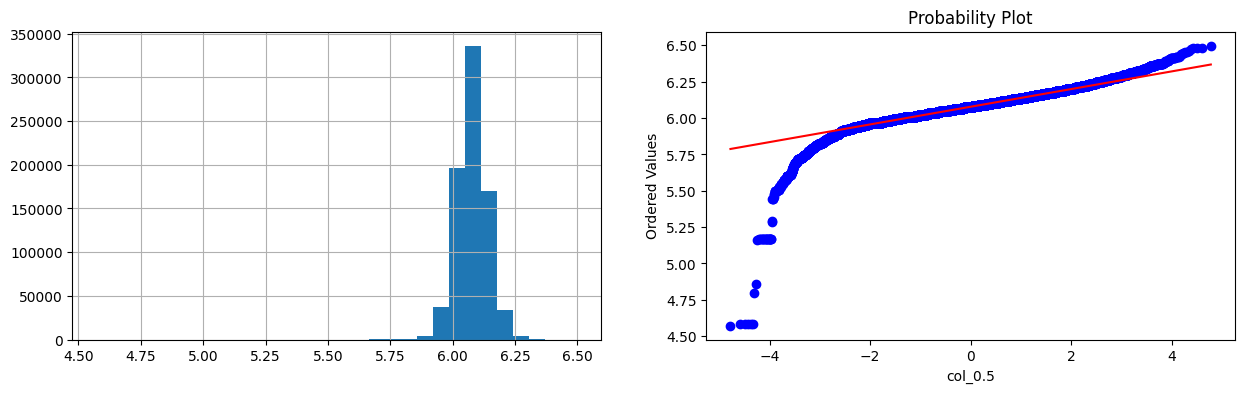

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


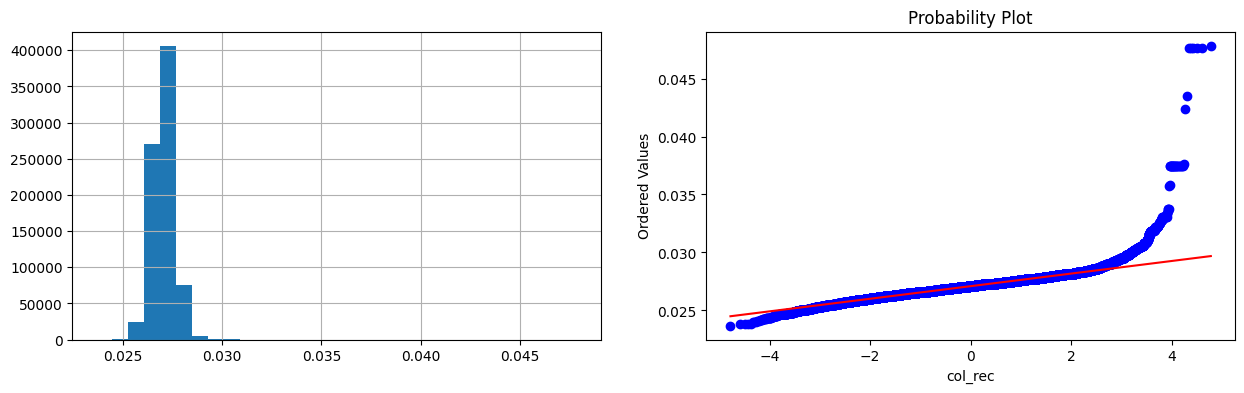

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


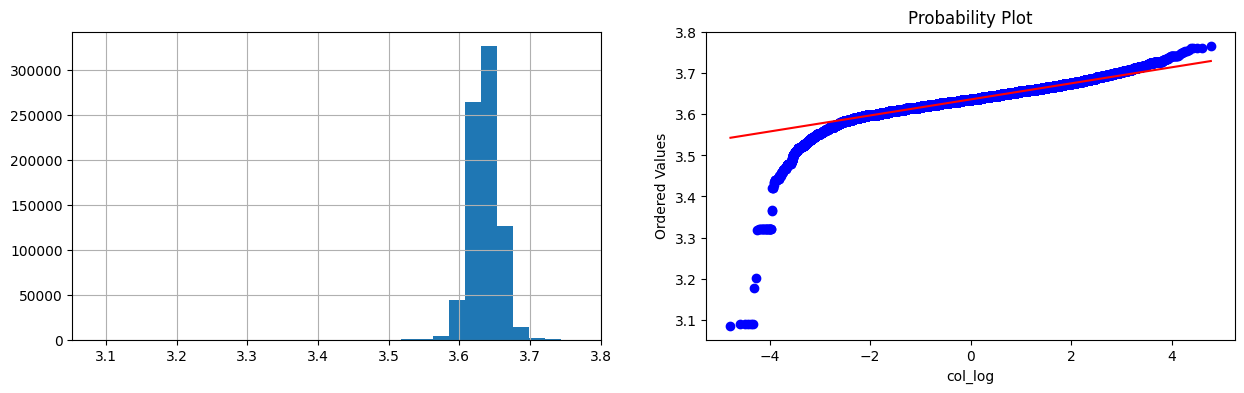

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


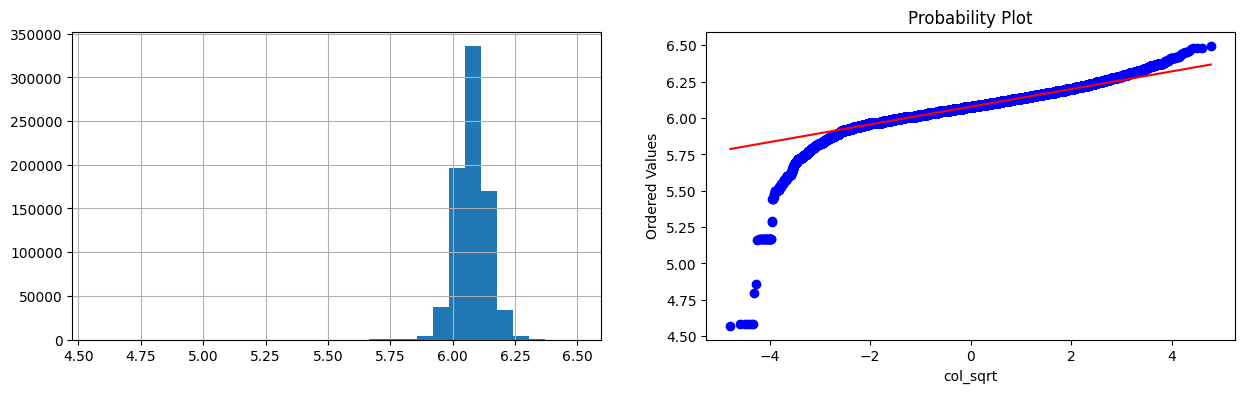

MAP
Actual plot


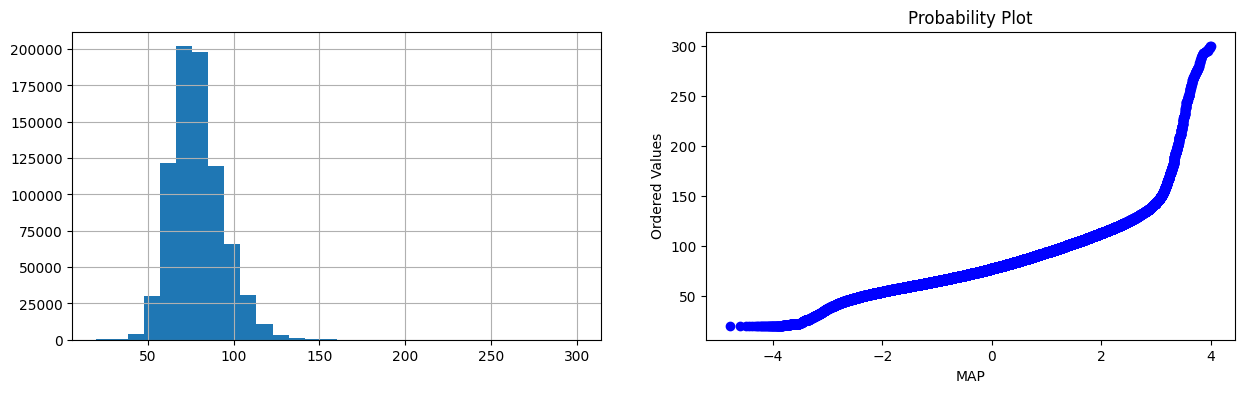

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


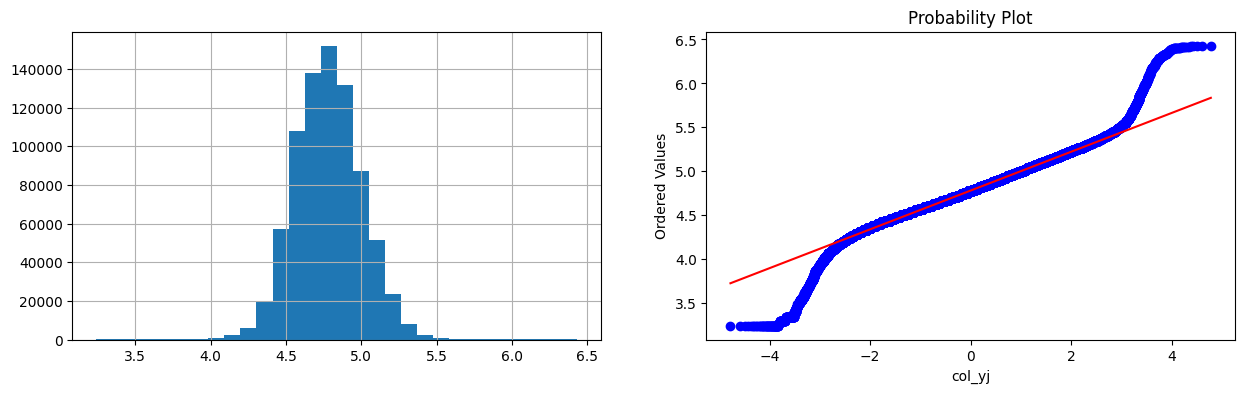

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


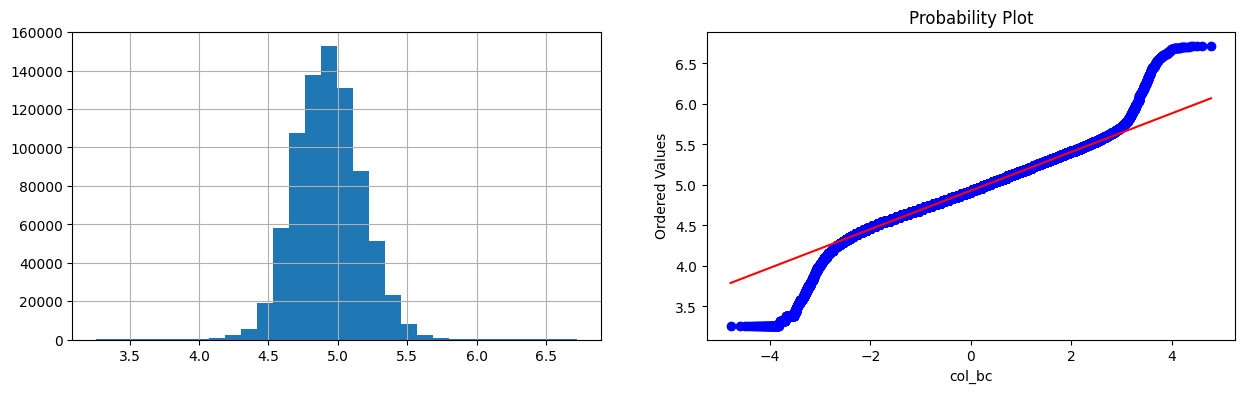

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


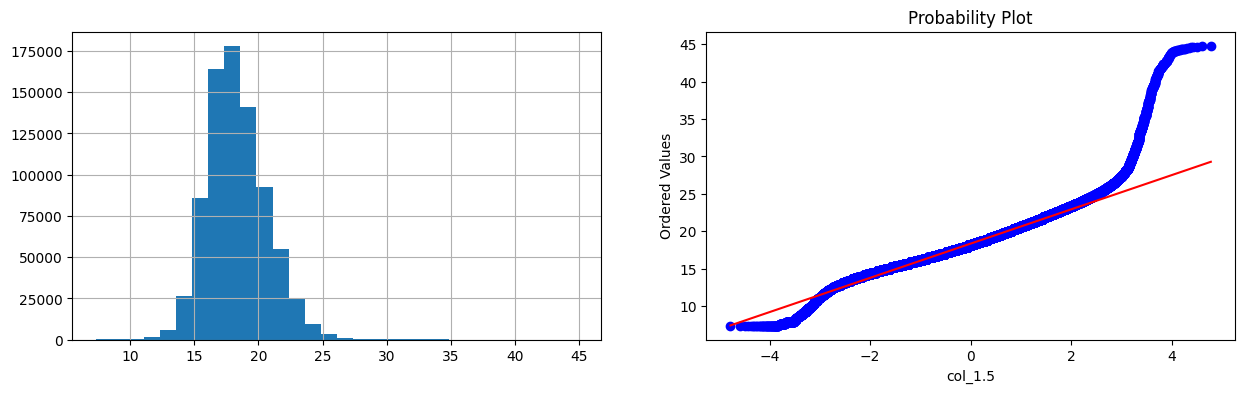

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


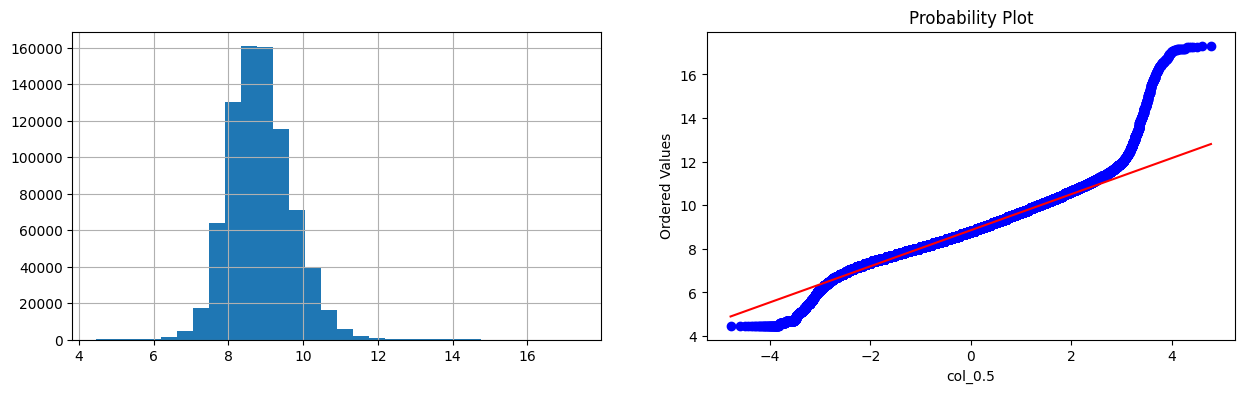

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


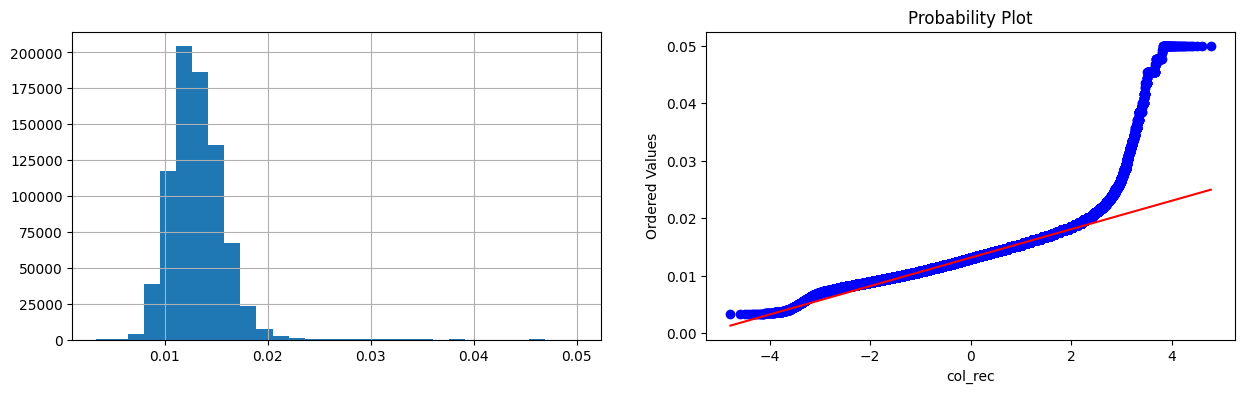

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


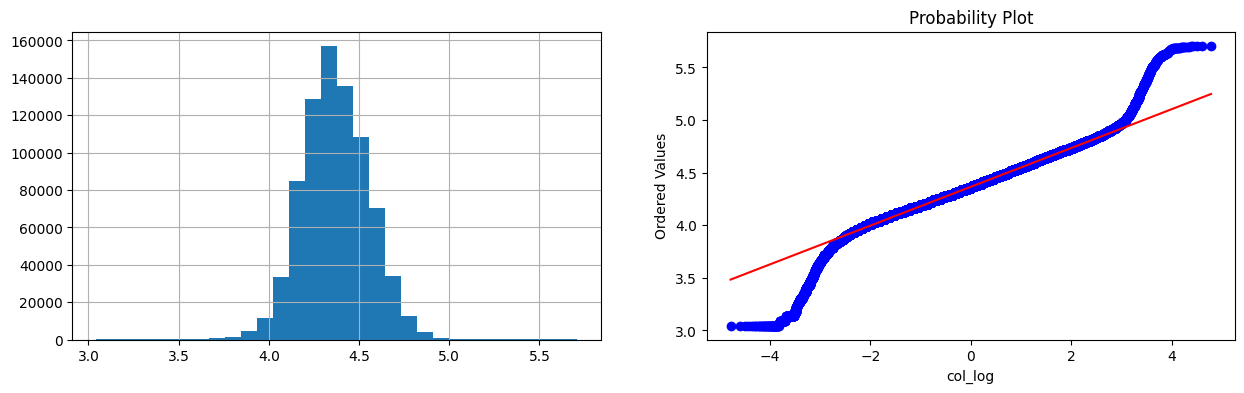

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


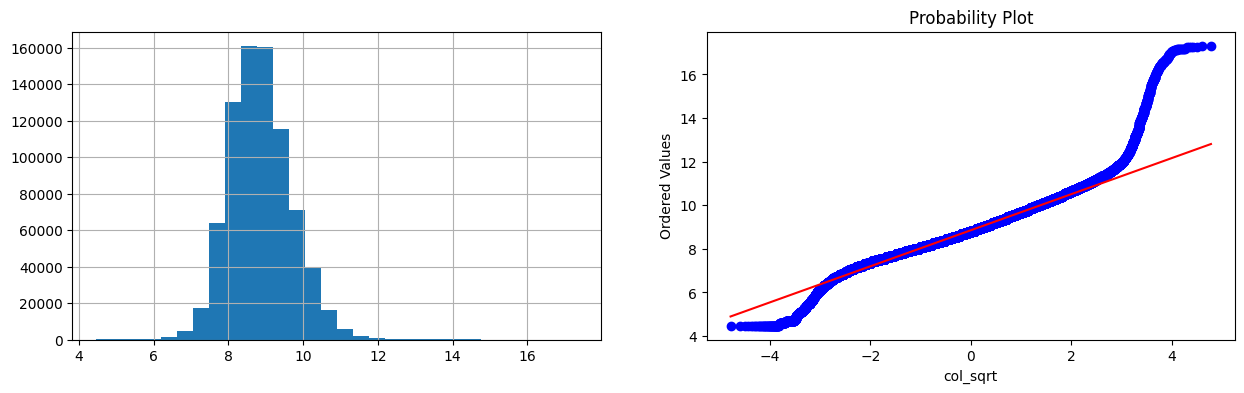

BUN
Actual plot


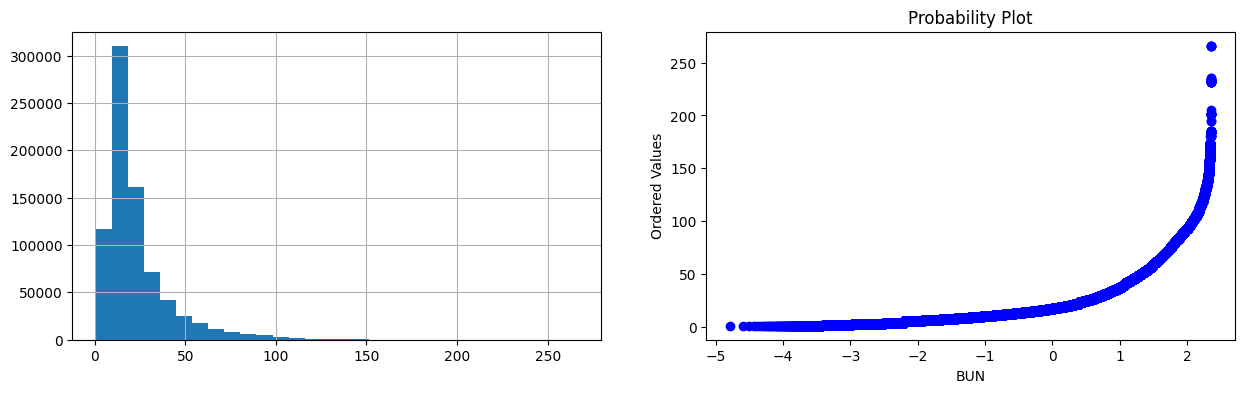

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


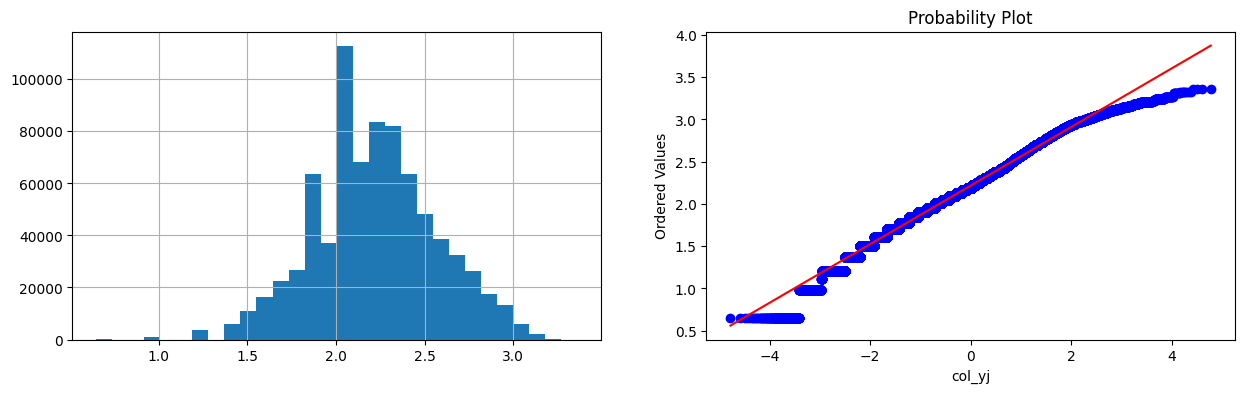

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


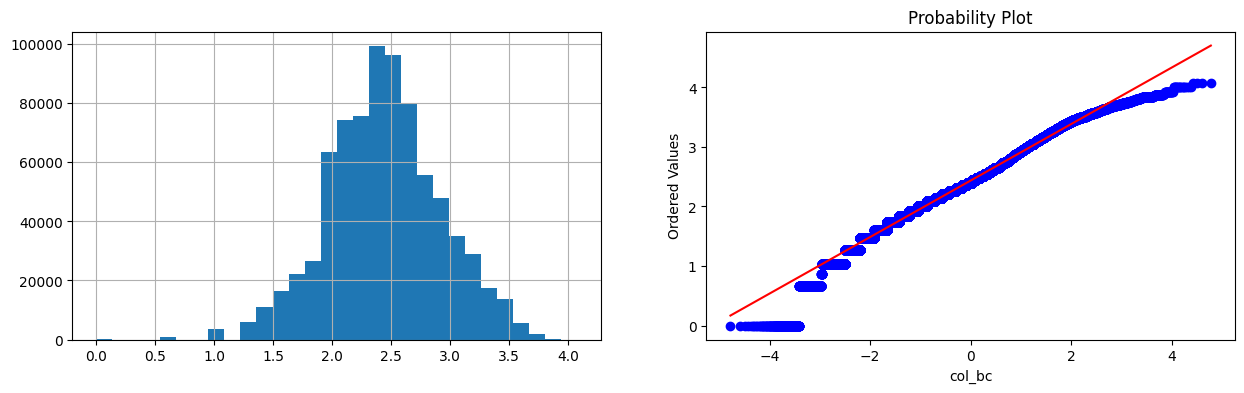

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


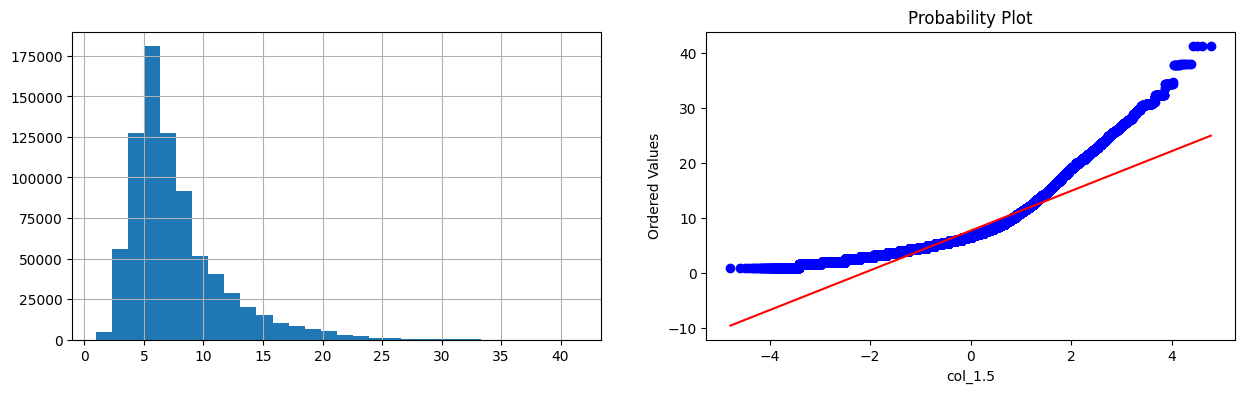

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


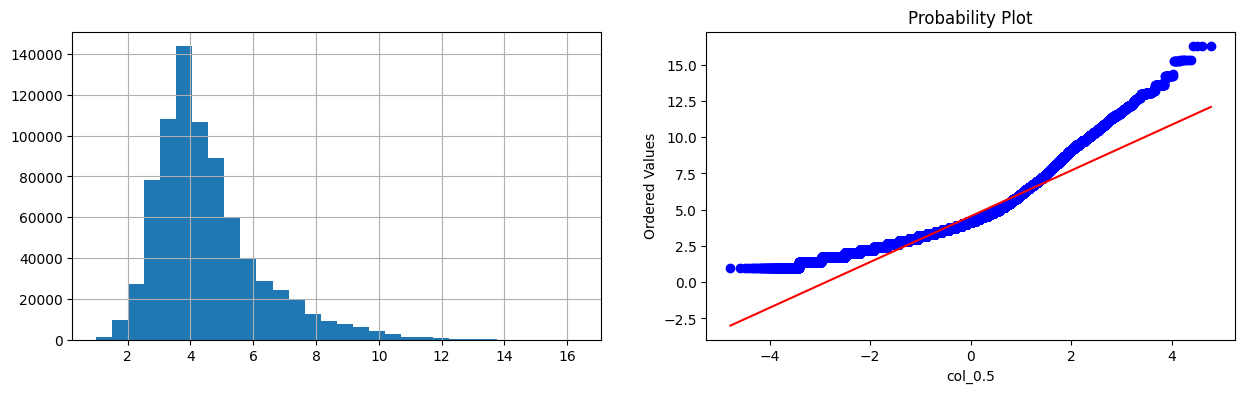

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


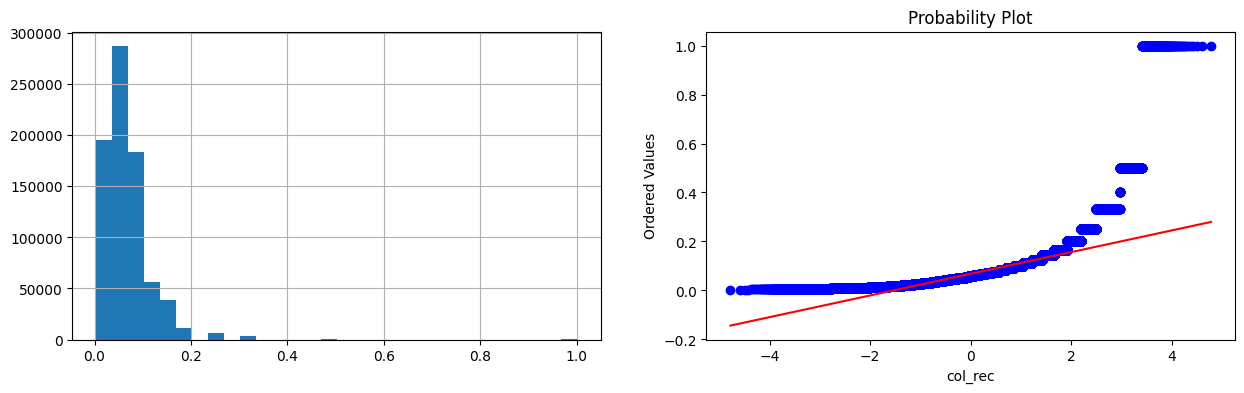

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


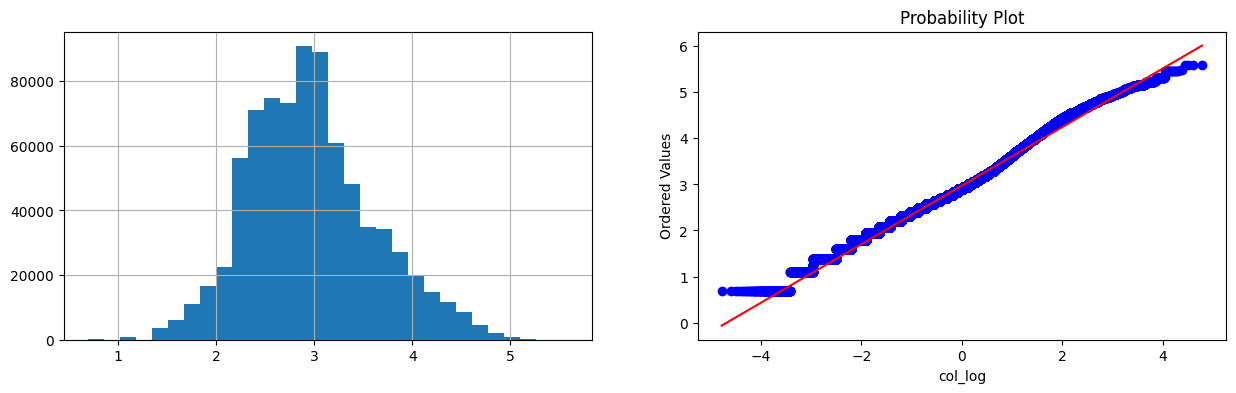

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


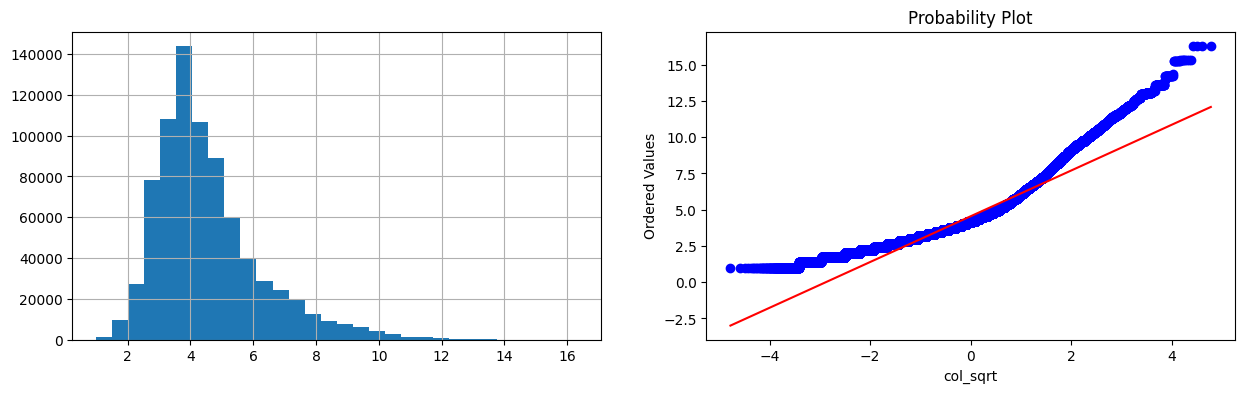

Creatinine
Actual plot


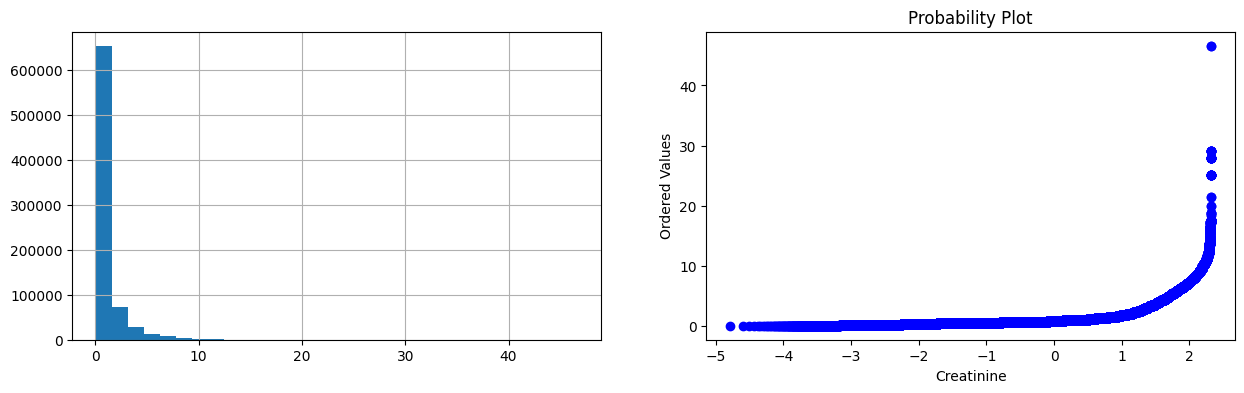

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


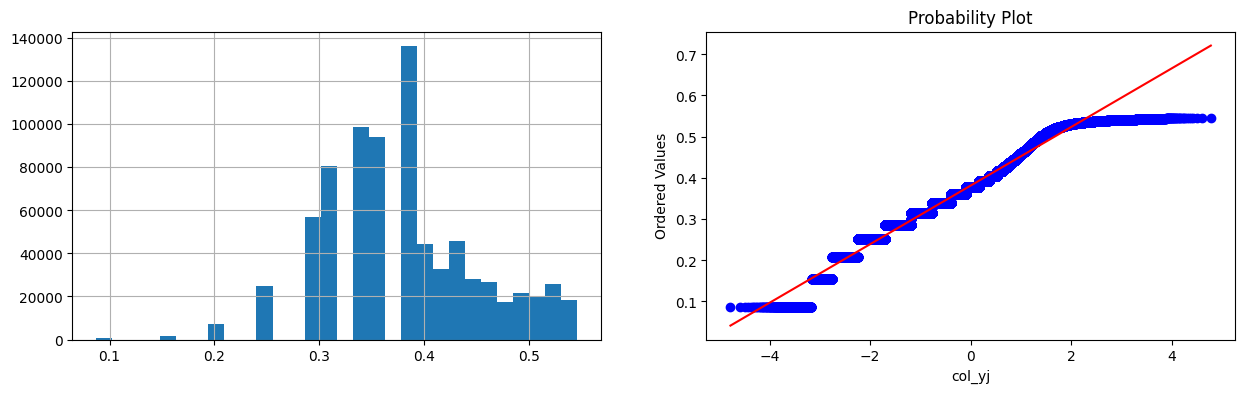

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


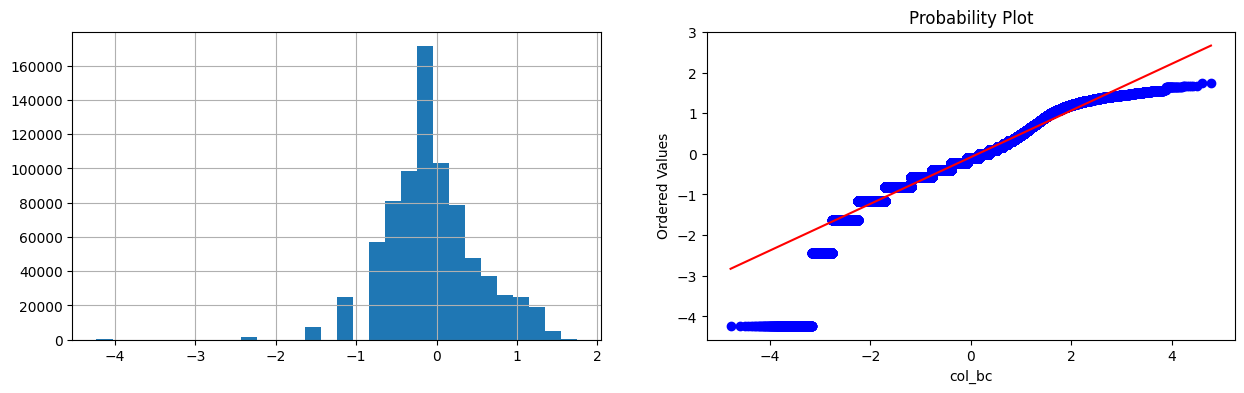

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


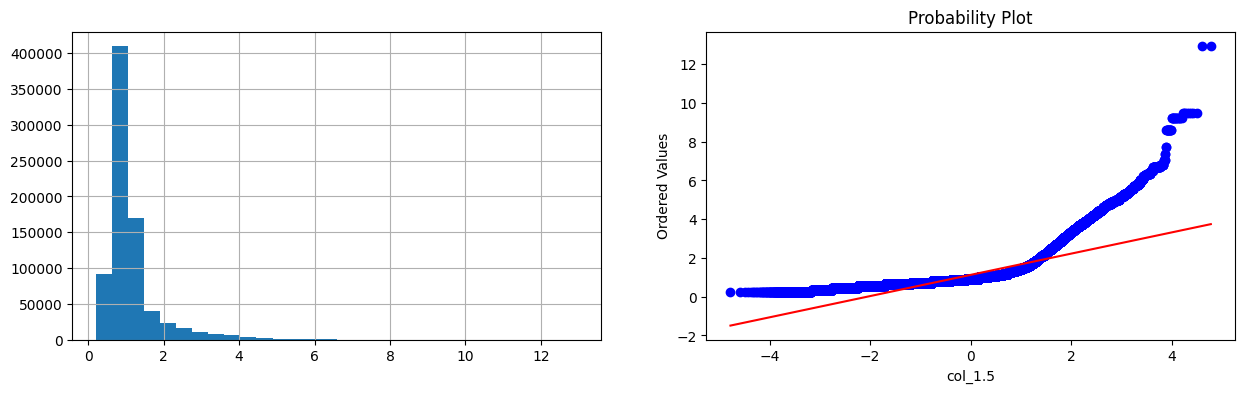

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


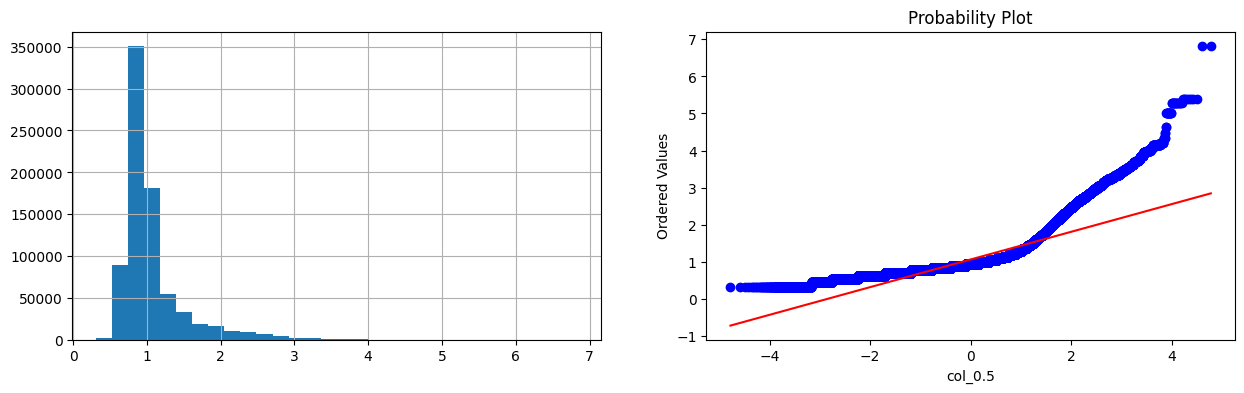

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


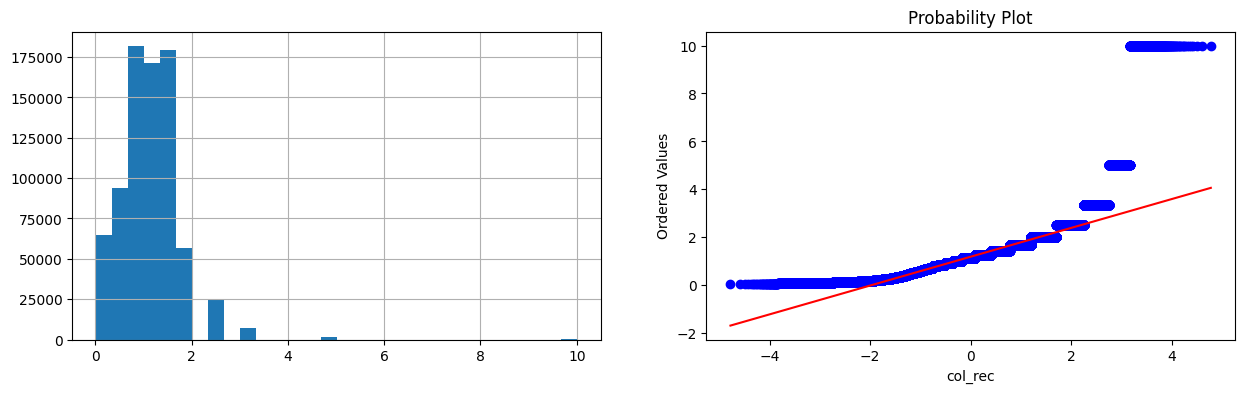

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


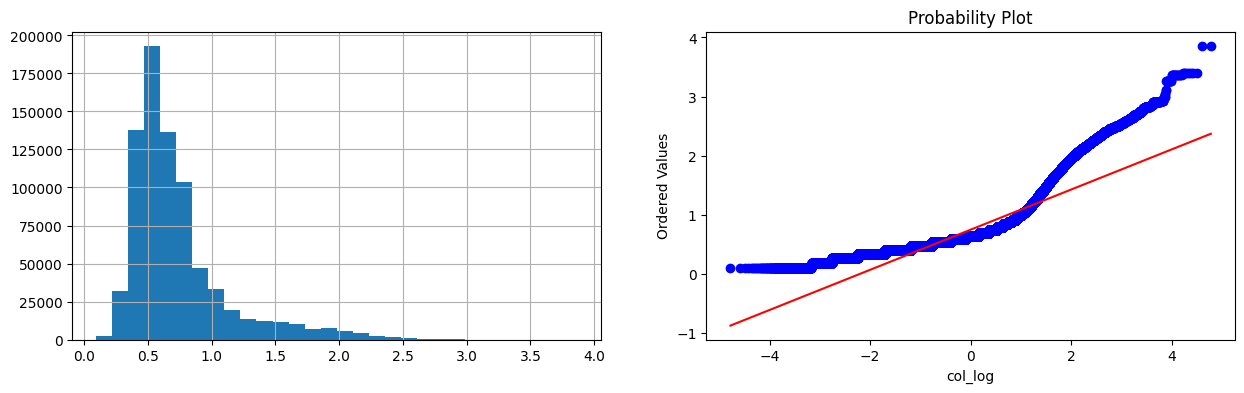

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


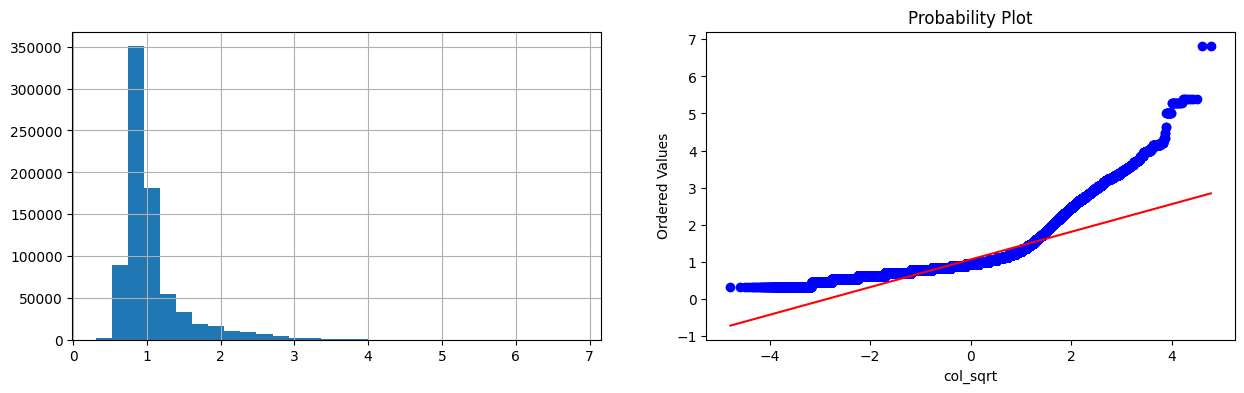

Glucose
Actual plot


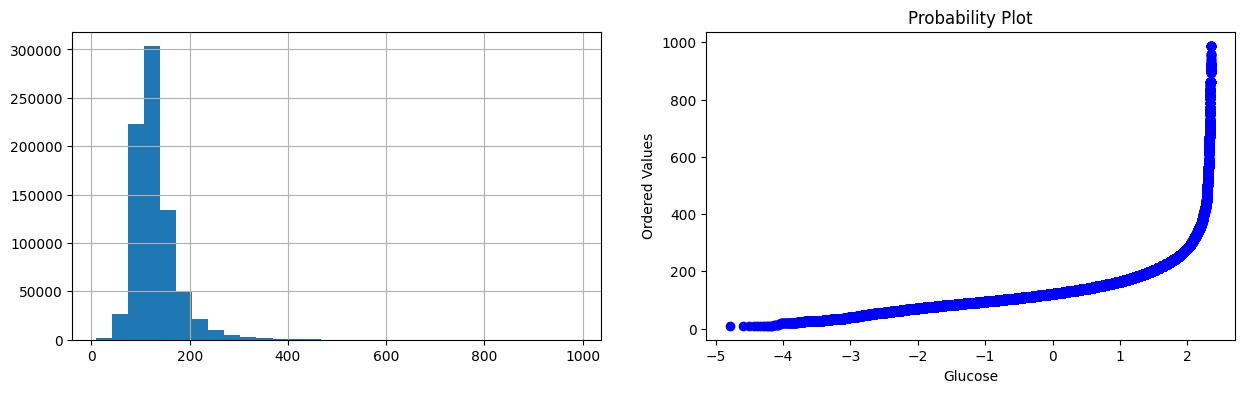

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


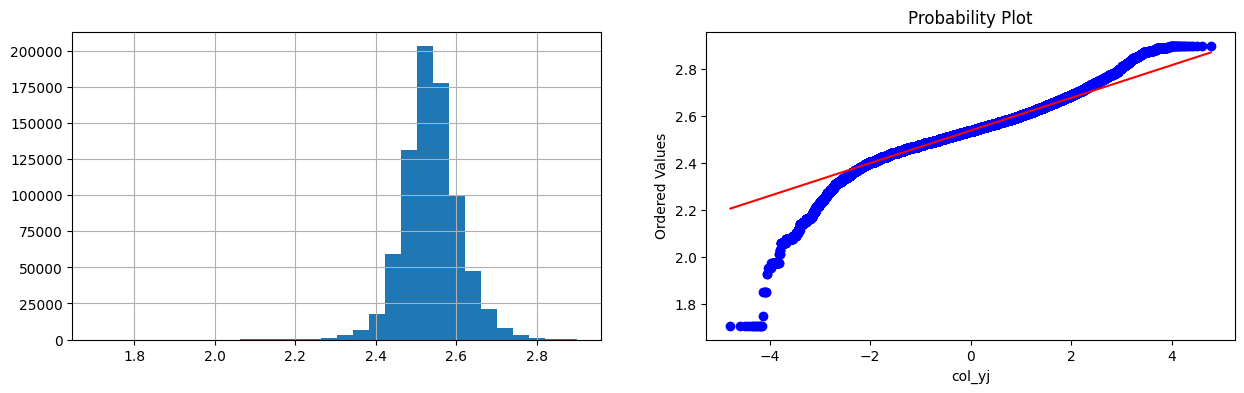

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


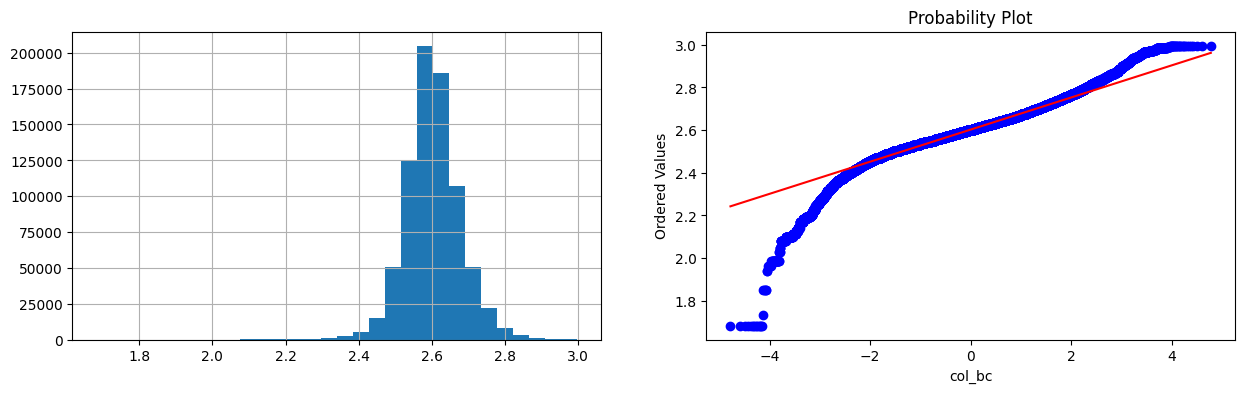

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


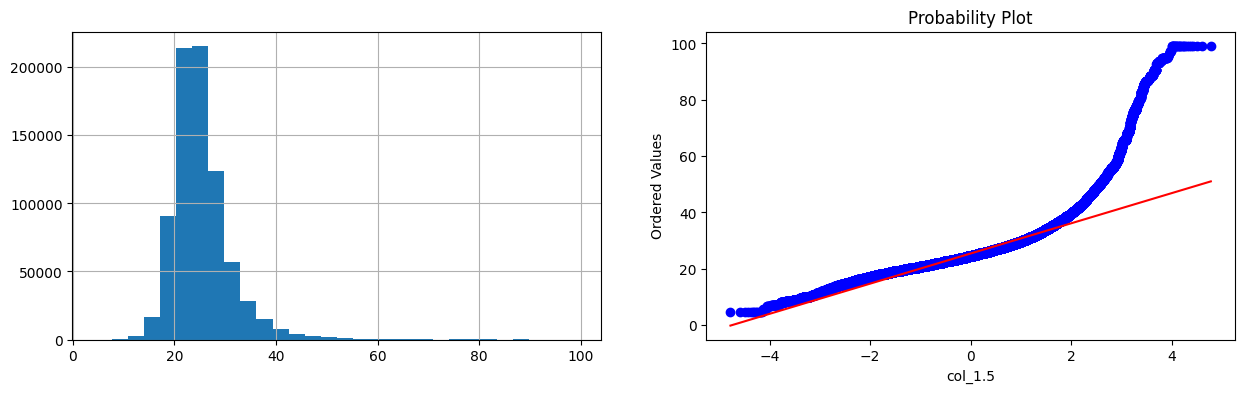

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


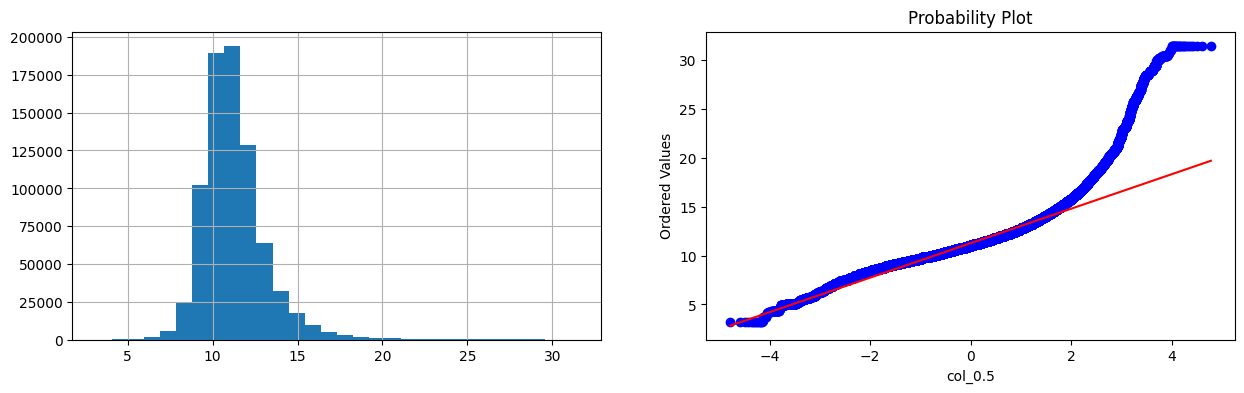

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


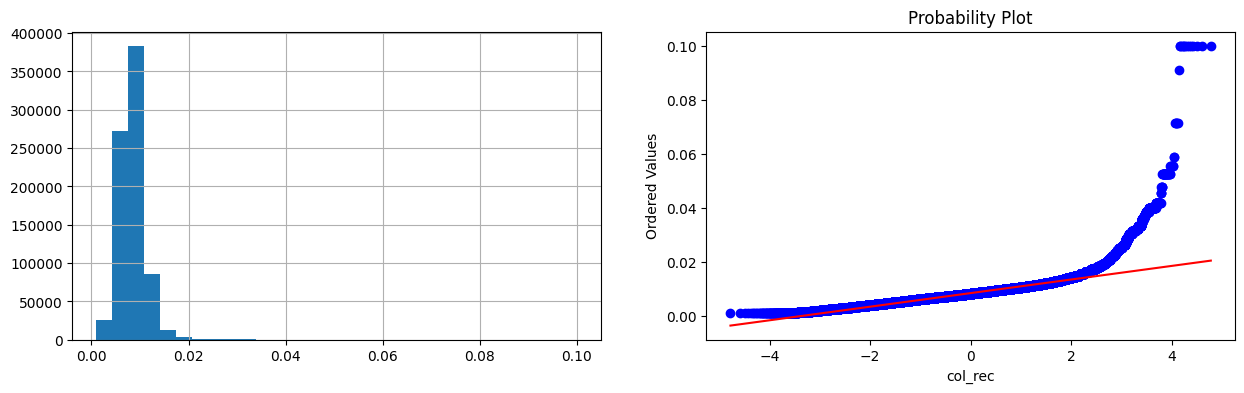

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


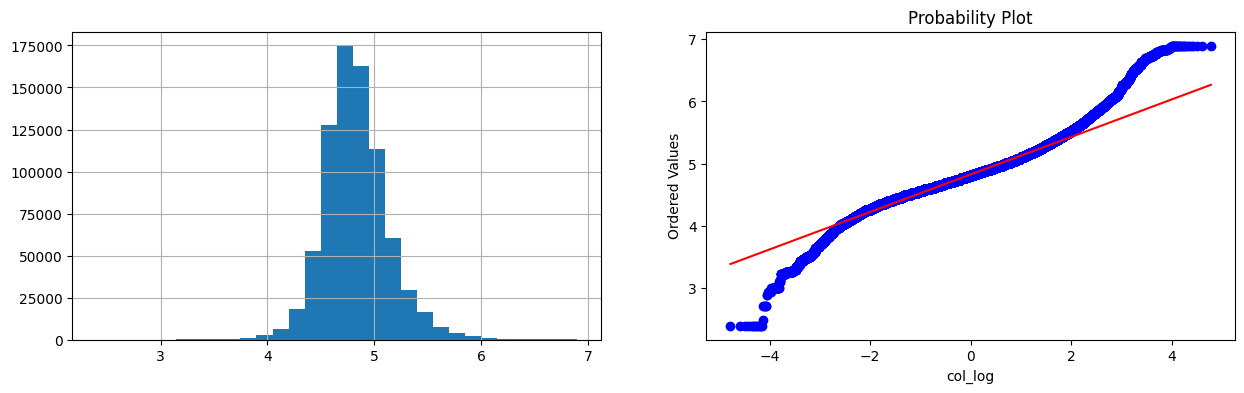

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


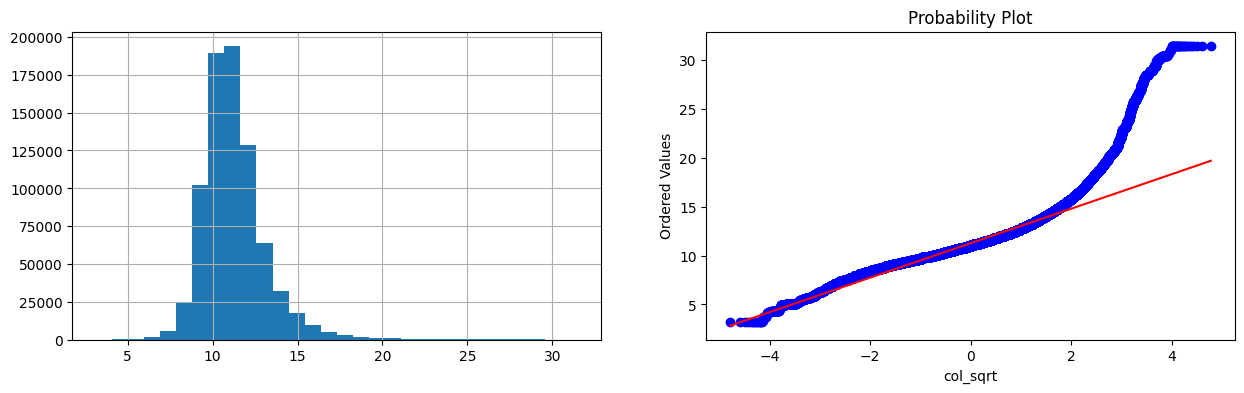

WBC
Actual plot


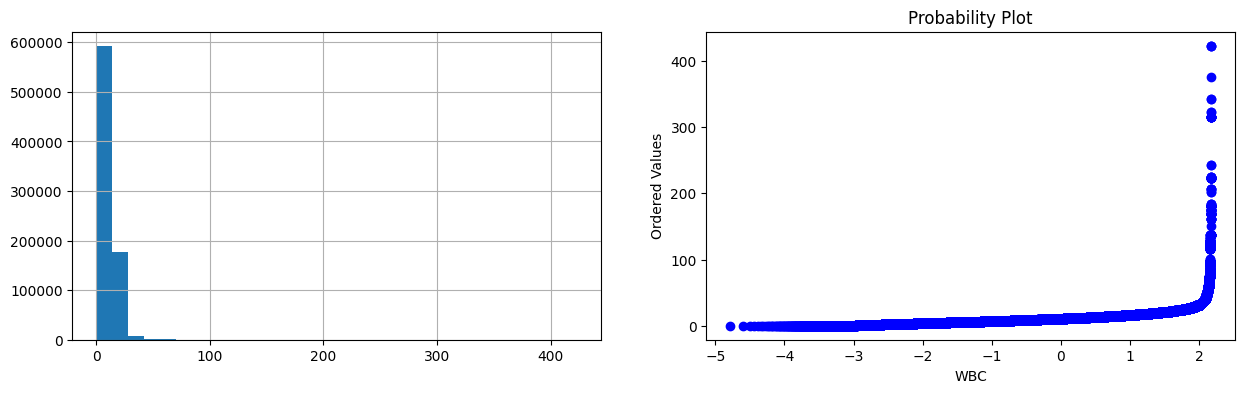

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


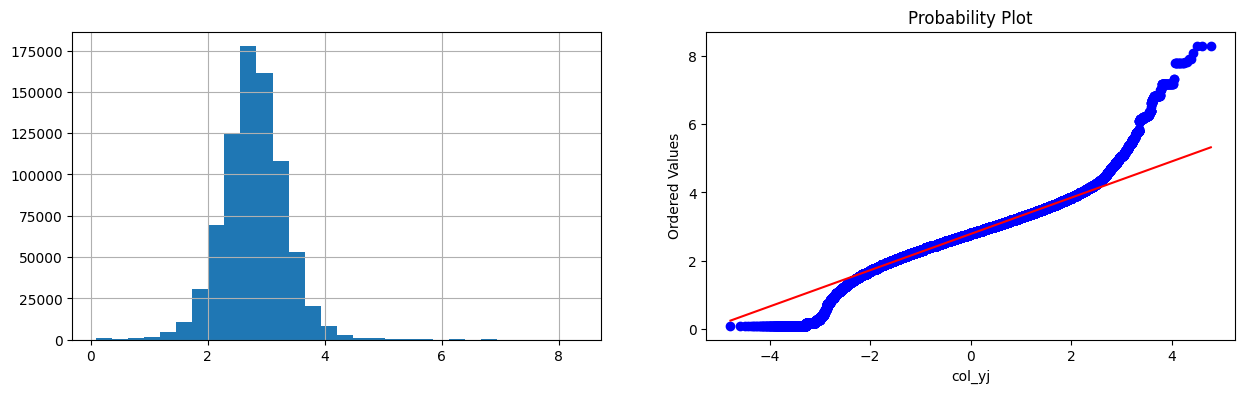

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


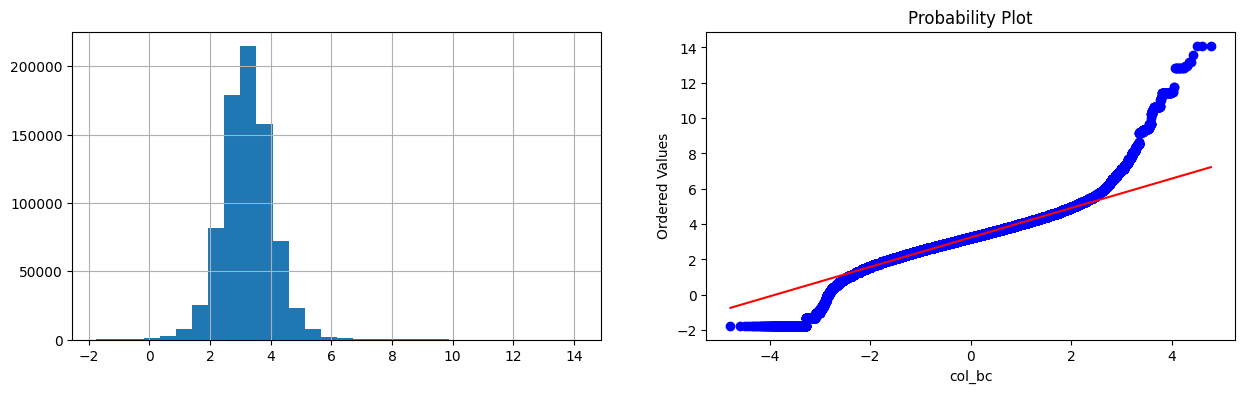

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


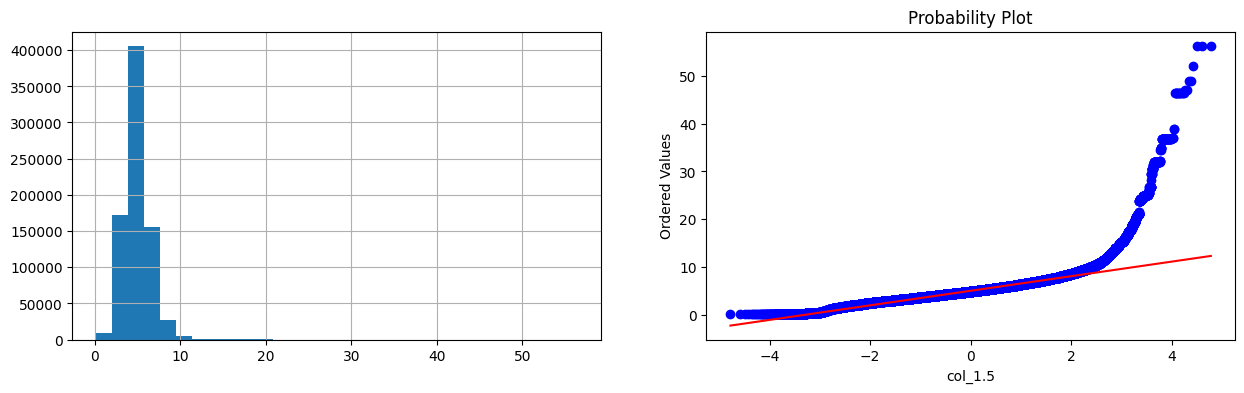

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


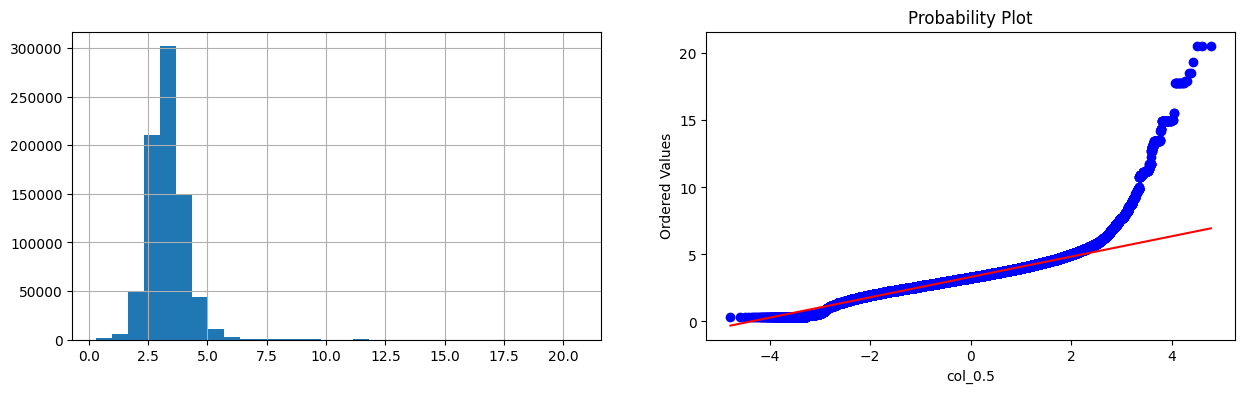

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


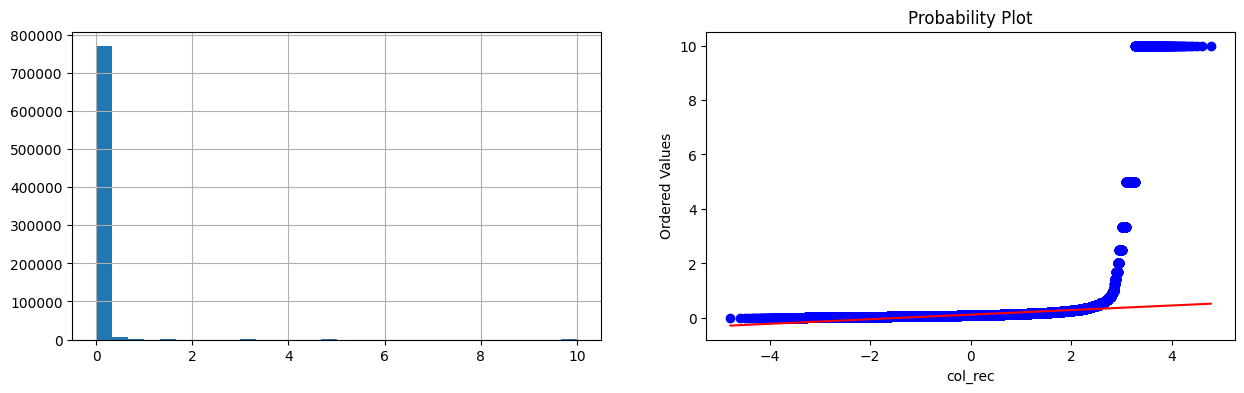

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


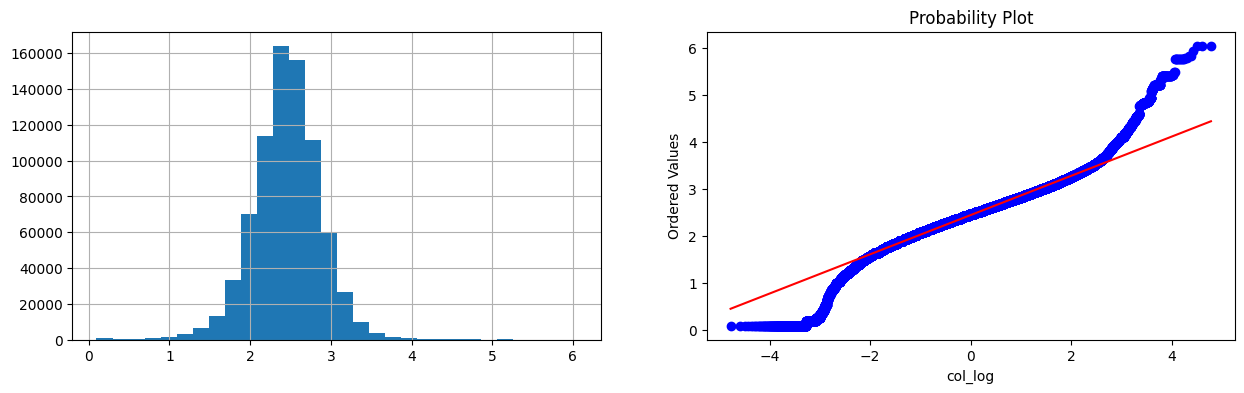

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


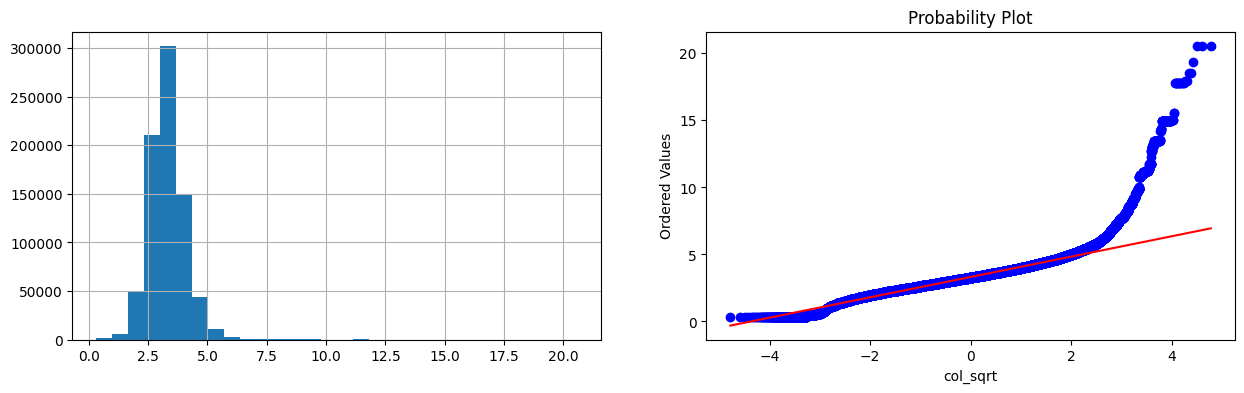

Platelets
Actual plot


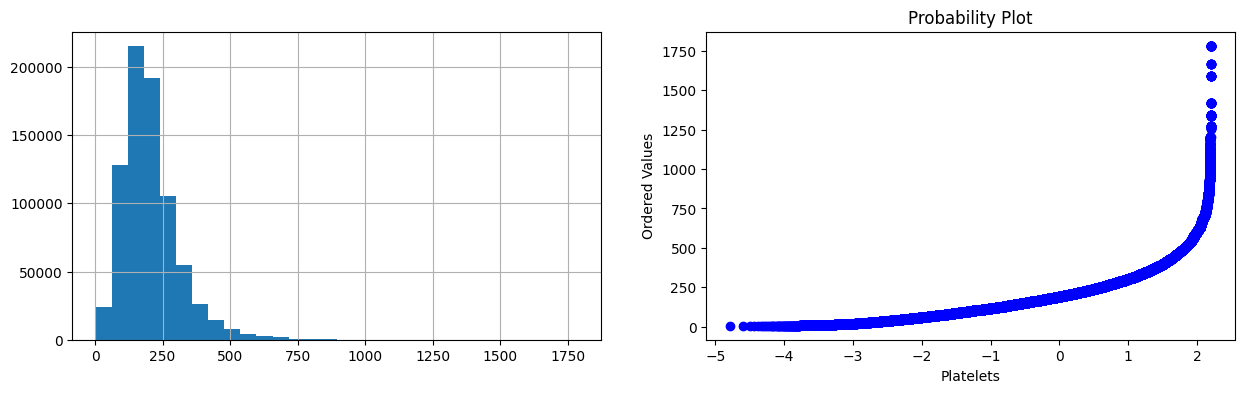

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_yj'], param = stats.yeojohnson(df_clean[col])


Yeo-Johnson plot


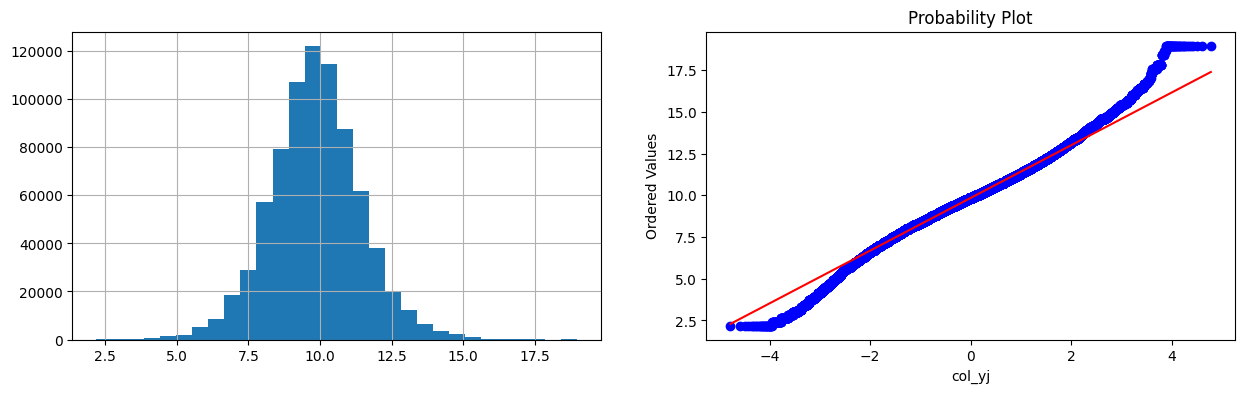

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_bc'], param = stats.boxcox(df_clean[col])


Box-Cox plot


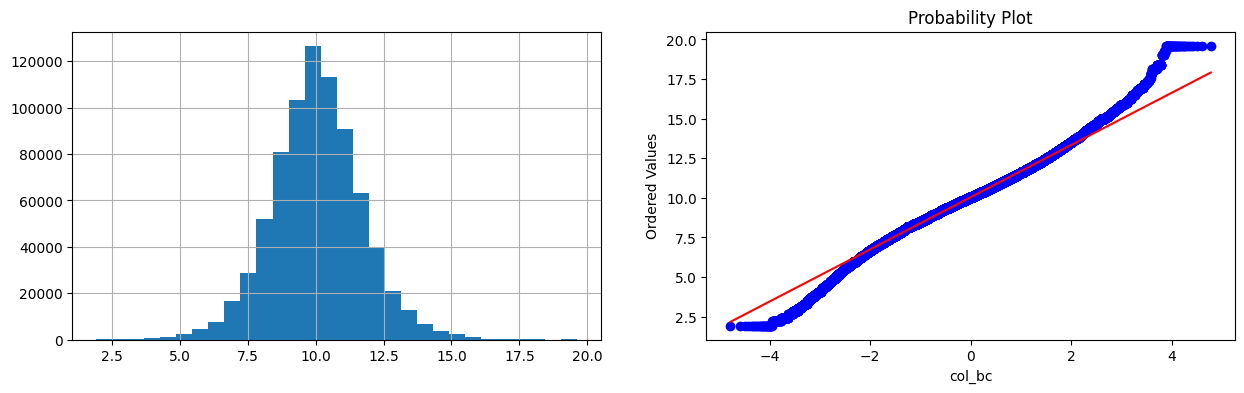

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_1.5'] = df_clean[col] ** (1/1.5)


**1/1.5 plot


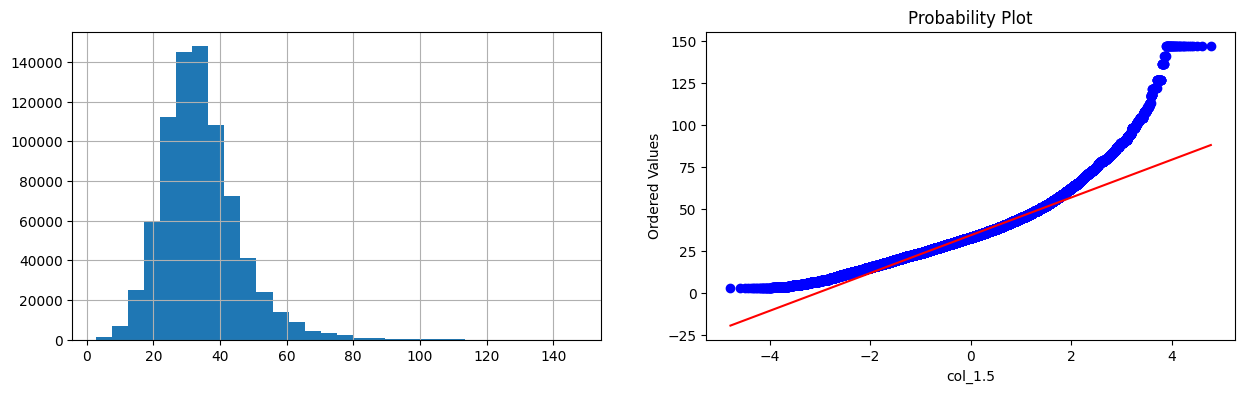

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_0.5'] = df_clean[col] ** 0.5


**0.5 plot


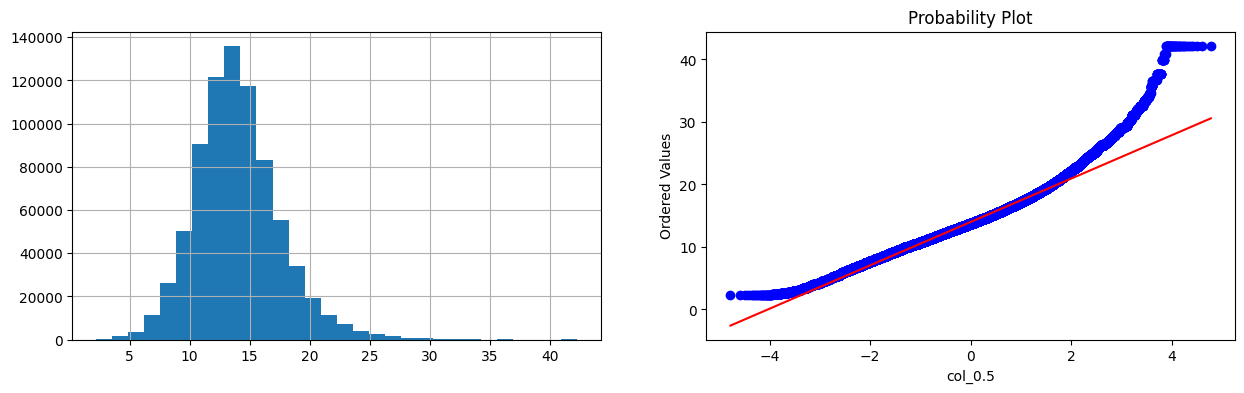

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_rec'] = 1 / (df_clean[col] + 0.00001)


Inverse plot


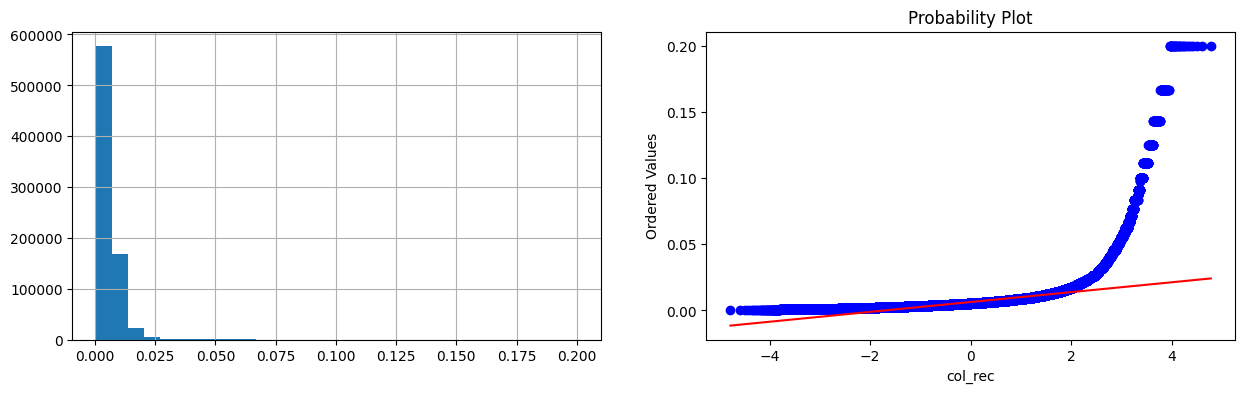

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_log'] = np.log(df_clean[col] + 1)


Logarithmic plot


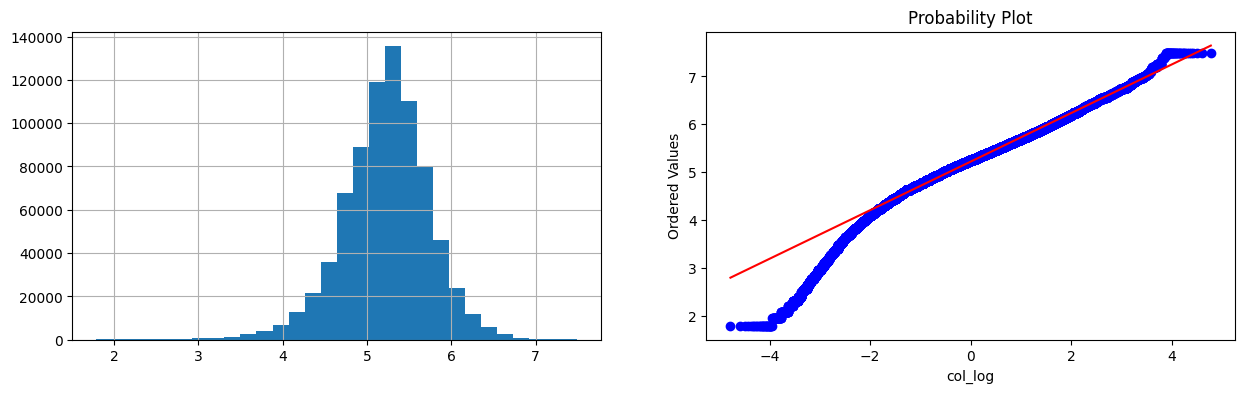

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_24988\58619111.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['col_sqrt'] = np.sqrt(df_clean[col])


Square root plot


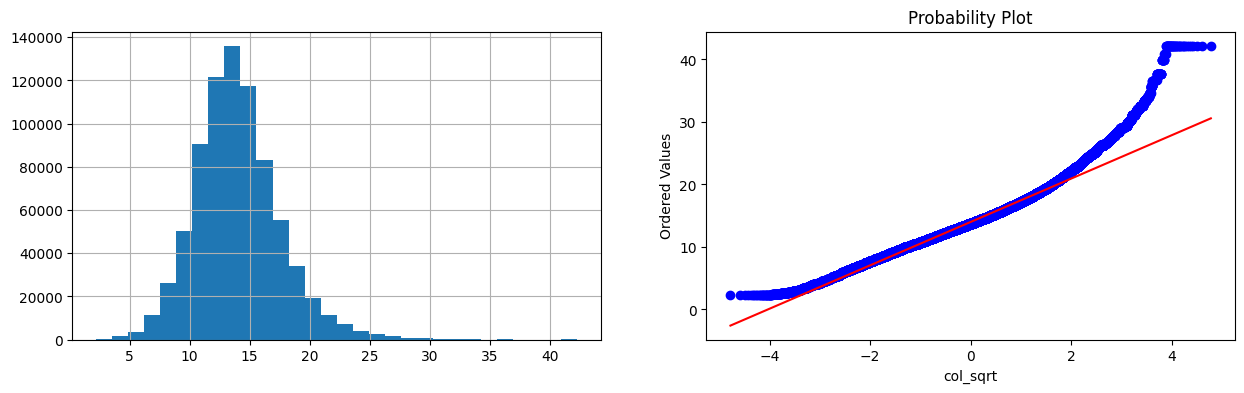

In [70]:
lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets']
for i in lst:
    print(i)
    try_gaussian(df_train_impute, i)

In [71]:
columns_to_drop = ['col_yj', 'col_1.5', 'col_.5', 'col_rec', 'col_log']
columns_to_drop_existing = [col for col in columns_to_drop if col in df_train_impute.columns]
df_train_impute = df_train_impute.drop(columns=columns_to_drop_existing)


In [72]:
df_train_impute.head(n=10)

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072
1,1,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072
2,2,78.0,100.0,35.78,42.5,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072
3,3,73.0,100.0,35.78,74.0,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072
4,4,70.0,100.0,35.78,74.0,14.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072
5,5,62.0,100.0,35.78,85.0,14.0,20.0,103.0,0.7,130.0,30.2,10.0,11.0,303.0,68.54,0,-0.02,6,0,17072
6,6,61.0,100.0,35.78,75.0,14.0,20.0,103.0,0.7,130.0,30.2,10.0,11.0,303.0,68.54,0,-0.02,7,0,17072
7,7,68.0,100.0,35.78,93.5,16.0,20.0,103.0,0.7,130.0,30.2,10.0,11.0,303.0,68.54,0,-0.02,8,0,17072
8,8,71.0,100.0,36.39,74.0,14.0,20.0,103.0,0.7,130.0,30.2,10.0,11.0,303.0,68.54,0,-0.02,9,0,17072
9,9,69.0,100.0,36.39,79.0,14.0,20.0,103.0,0.7,130.0,30.2,10.0,11.0,303.0,68.54,0,-0.02,10,0,17072


In [73]:
columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  df_train_impute[i] = np.log(df_train_impute[i]+1)

In [74]:
df_train_impute.head(n=10)

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,65.0,100.0,35.78,4.290459,16.5,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,0,-0.02,1,0,17072
1,1,65.0,100.0,35.78,4.290459,16.5,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,0,-0.02,2,0,17072
2,2,78.0,100.0,35.78,3.772761,17.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,0,-0.02,3,0,17072
3,3,73.0,100.0,35.78,4.317488,17.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,0,-0.02,4,0,17072
4,4,70.0,100.0,35.78,4.317488,14.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,0,-0.02,5,0,17072
5,5,62.0,100.0,35.78,4.454347,14.0,3.044522,103.0,0.530628,4.875197,30.2,10.0,2.484907,5.717028,68.54,0,-0.02,6,0,17072
6,6,61.0,100.0,35.78,4.330733,14.0,3.044522,103.0,0.530628,4.875197,30.2,10.0,2.484907,5.717028,68.54,0,-0.02,7,0,17072
7,7,68.0,100.0,35.78,4.548600,16.0,3.044522,103.0,0.530628,4.875197,30.2,10.0,2.484907,5.717028,68.54,0,-0.02,8,0,17072
8,8,71.0,100.0,36.39,4.317488,14.0,3.044522,103.0,0.530628,4.875197,30.2,10.0,2.484907,5.717028,68.54,0,-0.02,9,0,17072
9,9,69.0,100.0,36.39,4.382027,14.0,3.044522,103.0,0.530628,4.875197,30.2,10.0,2.484907,5.717028,68.54,0,-0.02,10,0,17072


In [75]:
df_train_impute = df_train_impute.dropna()

In [76]:
null_values = df_train_impute.isnull().mean()*100
null_values

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
MAP            0.0
Resp           0.0
BUN            0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Hct            0.0
Hgb            0.0
WBC            0.0
Platelets      0.0
Age            0.0
Gender         0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
Patient_ID     0.0
dtype: float64

In [77]:
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [78]:
sample = df_train_impute

In [79]:
threshold = 0.25 * len(sample)
columns_to_drop = df_train_impute.columns[sample.isnull().sum() > threshold]

# Drop the identified columns
df_train_impute_cleaned = df_train_impute.drop(columns=columns_to_drop)

# Print the columns that were removed
print(f"Columns removed due to more than 25% null values: {list(columns_to_drop)}")

# Print the cleaned DataFrame columns
print(df_train_impute_cleaned.columns)

Columns removed due to more than 25% null values: []
Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')


In [80]:
print(len(df_train_impute_cleaned.columns))
print(len(df_train_impute.columns))

20
20


In [81]:
def get_data_ready(df):
  columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
  df = df.assign(Unit=df['Unit1'] + df['Unit2'])
  # dropping columns based on redundancy
  df = df.drop(columns=columns_drop)
  grouped_by_patient = df.groupby('Patient_ID')
  # imputing backfill and forward fill
  df = grouped_by_patient.apply(lambda x: x.bfill().ffill())
  # dropping all the columns with null values more than 25% and patient_id
  null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2','Unit', 'Patient_ID']
  df = df.drop(columns=null_col)
  # gaussian transformation
  columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
  for i in columns_normalized:
    df[i] = np.log(df[i]+1)
  # normailizing
  scaler = StandardScaler()
  df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
  # onehot encoding the gender
  one_hot = pd.get_dummies(df['Gender'])
  df = df.join(one_hot)
  df = df.drop('Gender', axis=1)
  df = df.dropna()
  return df

In [82]:
def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [83]:
majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))


number of sepsis label 1 is 15284
while number of sepsis label 0 is 750935


In [84]:
majority_class_subset = majority_class.sample(n=2*len(minority_class))
df_train_impute = pd.concat([majority_class_subset, minority_class])

In [6]:
corr_matrix(df_train_impute)

NameError: name 'corr_matrix' is not defined

In [2]:

df_train_impute.head(n=10)

NameError: name 'df_train_impute' is not defined

In [87]:
file_path = 'E:/dataFinal.csv'

df_train_impute.to_csv(file_path, index=False)
print(f"DataFrame exported to {file_path}")

DataFrame exported to E:/dataFinal.csv


In [3]:
import pandas as pd
MainData = pd.read_csv('E:/dataFinal.csv')

In [4]:
MainData.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,33,73.0,98.0,36.39,4.700480,21.0,2.995732,109.0,0.470004,5.141664,32.2,11.3,1.887070,4.477337,66.08,0,-2.88,34,0,11689
1,20,81.0,98.0,37.33,4.382027,22.0,2.639057,102.0,0.405465,4.820282,32.8,11.6,2.617396,4.890349,79.65,0,-10.91,21,0,3255
2,16,94.0,95.0,37.20,4.110874,27.0,3.135494,101.0,0.788457,4.718499,25.9,8.8,2.517696,5.010635,69.83,1,-277.56,18,0,6103
3,6,63.0,100.0,36.83,4.110874,18.0,3.044522,106.0,0.587787,5.081404,24.5,8.5,2.815409,5.676754,85.82,0,-0.01,8,0,3001
4,20,106.0,94.0,37.78,4.317488,20.0,2.197225,102.0,0.336472,5.081404,28.1,9.2,2.501436,5.303305,63.06,0,-36.93,21,0,17413


In [5]:
MainData.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [8]:
MainData['Hour'] = pd.to_numeric(MainData['Hour'])

In [9]:
def find_longest_sequence(group):
    group = group.sort_values(by='Hour')
    group['Gap'] = group['Hour'].diff()
    group['Sequence'] = (group['Gap'] > 1).cumsum()
    longseq = group.groupby('Sequence').size().max()
    return longseq

In [15]:
longest_sequences = MainData.groupby('Patient_ID').apply(find_longest_sequence)
longest_sequences.to_csv('longest_sequences.csv', index=False)

C:\Users\T.S JAIKISHORE\AppData\Local\Temp\ipykernel_21760\1422102303.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  longest_sequences = MainData.groupby('Patient_ID').apply(find_longest_sequence)


In [10]:
columns_to_aggregate = ['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride', 'Creatinine',
                        'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']

In [12]:
aggregate_stats = MainData.groupby('Patient_ID')[columns_to_aggregate].agg(['mean', 'median', 'max', 'min'])
print("Aggregate statistics for each patient:")
print(aggregate_stats)

Aggregate statistics for each patient:
                    HR                            O2Sat                       \
                  mean median    max    min        mean median    max    min   
Patient_ID                                                                     
6           109.000000  109.0  111.0  107.0   99.500000   99.5  100.0   99.0   
8            72.000000   72.0   72.0   72.0   97.000000   97.0   97.0   97.0   
9           115.687500  118.5  138.0   94.0   97.604167   97.0  100.0   96.0   
11           91.909091   90.0  106.0   81.0  100.000000  100.0  100.0  100.0   
12          108.000000  108.0  108.0  108.0   94.000000   94.0   94.0   94.0   
...                ...    ...    ...    ...         ...    ...    ...    ...   
20638        80.000000   80.0   80.0   80.0   95.000000   95.0   95.0   95.0   
20640        76.500000   76.5   76.5   76.5   96.000000   96.0   96.0   96.0   
20641       101.500000  101.5  101.5  101.5   95.000000   95.0   95.0   95.0   
2

In [7]:
import pandas as pd

In [8]:
data2 = pd.read_csv('C:/Users/T.S JAIKISHORE/Downloads/archive (1)/Dataset.csv')
data2.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [1]:
import pandas as pd

In [2]:
evaluation = pd.read_csv('C:/Users/T.S JAIKISHORE/Downloads/archive (1)/Dataset.csv')

In [5]:
len(evaluation)

1552210

In [22]:
unique_sepsis_count = evaluation.loc[evaluation['SepsisLabel']==0,'Patient_ID'].nunique()

In [23]:
unique_sepsis_count

39910